PA2 Notebook 2b: Aggregate by Geography
===

This is notebook 2b for DRWI Pollution Assessment Stage 2 (PA2) analysis.

It reads Pollution Assessment results calculated for every NHDplus catchment (COMID) in Notebook 2, and aggregrates results over various geographies using:
- Aggreation Method 2: Attenuated reach loads accumulated through the stream network

# Installation and Setup

Carefully follow our **[Installation Instructions](README.md#get-started)**, especially including:
- Creating a virtual environment for this repository (step 3)

## Import Python Dependencies

In [1]:
from pathlib import Path
from importlib import reload

import numpy     as np
import pandas    as pd
import geopandas as gpd

import hvplot.pandas
import holoviews as hv
import geoviews as gv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
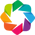

In [2]:
# Custom functions for Pollution Assessment
import pollution_assessment as pa

## Set Paths


In [3]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

In [4]:
# Assign a path for the geographies folder.
geography_path = project_path / 'geography/'

In [5]:
# Assign a path for the data OUTPUT folder.
data_output_path = project_path / 'stage2/data_output/'

# Import Data

## Open Files for Geographies

In [6]:
%%time
# read geometry data from GeoParquet files
# huc12_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc12_outlets_drwi_gdf.parquet')
huc10_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc10_outlets_drwi_gdf.parquet')
huc08_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc08_outlets_drwi_gdf.parquet')

# new inlet data
huc12_in_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc12_in_outlets_drwi_gdf.parquet')

CPU times: user 169 ms, sys: 38.1 ms, total: 208 ms
Wall time: 201 ms


In [7]:
# This works at first, but fails later because of some change to `from_huc12s`
huc12_in_outlets_drwi_gdf.to_parquet(
    data_output_path /'test.parquet',
    engine='pyarrow',
    compression='brotli',
)

In [8]:
huc12_in_outlets_drwi_gdf.from_huc12s

huc12
020401010101              None
020401010102    [020401010101]
020401010103    [020401010102]
020401010104    [020401010103]
020401010105              None
                     ...      
020403020403    [020403020401]
020403020404              None
020403020405              None
020403020406              None
020403020407              None
Name: from_huc12s, Length: 481, dtype: object

In [9]:
huc12_in_outlets_drwi_gdf.info()
huc12_in_outlets_drwi_gdf.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   huc12_name     481 non-null    object  
 1   geometry       481 non-null    geometry
 2   centroid_xy    481 non-null    object  
 3   comid          481 non-null    Int64   
 4   nord           481 non-null    Int64   
 5   to_huc12       481 non-null    category
 6   outlet_comid   481 non-null    Int64   
 7   from_huc12s    231 non-null    object  
 8   inlet_comids   231 non-null    object  
 9   outlet_comids  481 non-null    object  
 10  huc10          481 non-null    category
 11  huc08          481 non-null    category
 12  in_drb         481 non-null    boolean 
dtypes: Int64(3), boolean(1), category(3), geometry(1), object(5)
memory usage: 72.9+ KB


huc12_name  \
huc12                                                            
020401010101   Town Brook-Headwaters West Brach Delaware River   
020401010102  Betty Brook-Headwaters West Brach Delaware River   
020401010103   Rose Brook-Headwaters West Brach Delaware River   
020401010104    Elk Creek-Headwaters West Brach Delaware River   
020401010105                       Upper Little Delaware River   

                                                       geometry  \
huc12                                                             
020401010101  POLYGON ((-8303725.462 5224646.990, -8303761.0...   
020401010102  POLYGON ((-8315136.657 5225191.846, -8315097.2...   
020401010103  POLYGON ((-8323990.577 5217953.339, -8323948.6...   
020401010104  POLYGON ((-8326727.279 5222215.417, -8326605.6...   
020401010105  POLYGON ((-8319654.283 5208307.086, -8319607.8...   

                                           centroid_xy    comid   nord  \
huc12                                                                    
020401010101  [-74.62155936289159, 42.387091234041016]  2612792  74293   
020401010102   [-74.71393635968639, 42.38194565669812]  2612800  74290   
020401010103  [-74.71097819143394, 42.330665690562654]  2612808  74288   
020401010104   [-74.82334627464569, 42.34506256688788]  2612820  74282   
020401010105   [-74.78436638151948, 42.27096486797448]  2612842  74311   

                  to_huc12  outlet_comid     from_huc12s inlet_comids  \
huc12                                                                   
020401010101  020401010102       2612792            None         None   
020401010102  020401010103       2612800  [020401010101]    [2612792]   
020401010103  020401010104       2612808  [020401010102]    [2612800]   
020401010104  020401010106       2612820  [020401010103]    [2612808]   
020401010105  020401010106       2612842            None         None   

                   outlet_comids       huc10     huc08  in_drb  
huc12                                                           
020401010101           [2612792]  0204010101  02040101    True  
020401010102  [2612800, 2612922]  0204010101  02040101    True  
020401010103           [2612808]  0204010101  02040101    True  
020401010104           [2612820]  0204010101  02040101    True  
020401010105           [2612842]  0204010101  02040101    True

## Open Files from Notebook 2

In [10]:
# Results by COMID
reach_concs_gdf = gpd.read_parquet(data_output_path /'reach_concs_gdf.parquet')
# catch_loads_gdf = gpd.read_parquet(data_output_path /'catch_loads_gdf.parquet')

# Aggregation by HUC, using Method 1 (Sum of Local Loads) similar to PA1
huc12_load_gdf = gpd.read_parquet(data_output_path /'huc12_load_gdf.parquet')
huc10_load_gdf = gpd.read_parquet(data_output_path /'huc10_load_gdf.parquet')
huc08_load_gdf = gpd.read_parquet(data_output_path /'huc08_load_gdf.parquet')

# Explore HUC12 Outlets; Confirm & Correct Problems

## Create Functions to explore & correct outlets

In [11]:
# Create convenience functions
def huc12_outlet_info(huc12s: list) -> pd.DataFrame:
    columns = ['huc12_name', 'comid','outlet_comid', 'to_huc12', 'from_huc12s', 'inlet_comids', 'outlet_comids']
    problem_huc = huc12_in_outlets_drwi_gdf.loc[huc12s, columns]
    return problem_huc

def huc12_explore_comids(huc12: str) -> pd.DataFrame:
    columns = ['huc12','nord', 'nordstop','maflowv','tp_conc']
    explore_outlets = reach_concs_gdf.loc[reach_concs_gdf.huc12==huc12, columns]
    explore_outlets['tp_load'] = (explore_outlets.tp_conc * 28.3168 / 1000000) * explore_outlets.maflowv * 31557600 
    explore_outlets['nord_diff'] = explore_outlets.nordstop - explore_outlets.nord
    return explore_outlets

def huc12_reassign_outlet(huc12: str, new_outlet_comid: int) -> None:
    """Presently reassigns both `comid` and `outlet_comid`, but the later 
    should eventually be turned into a list
    """
    old_outlet_comid = huc12_in_outlets_drwi_gdf.comid[huc12]
    huc12_in_outlets_drwi_gdf.loc[huc12, 'comid'] = new_outlet_comid
    huc12_in_outlets_drwi_gdf.loc[huc12, 'outlet_comid'] = new_outlet_comid
    print(f'`outlet_comid` changed from {old_outlet_comid} to {huc12_in_outlets_drwi_gdf.comid[huc12]}')
    return None

# # This function below breaks the ability to write this field
# def huc12_reassign_from_huc12s(huc12: str, new_from_huc12s: list) -> None:
#     """Reassigns `from_huc12s` list."""
#     new_from_huc12s_array = np.array(pd.array(new_from_huc12s))
#     old_from_huc12s = huc12_in_outlets_drwi_gdf.from_huc12s[huc12]
#     huc12_in_outlets_drwi_gdf.at[problem_huc12, 'from_huc12s'] = new_from_huc12s_array
#     print(f'`outlet_comid` changed from {old_from_huc12s} to {huc12_in_outlets_drwi_gdf.from_huc12s[huc12]}')
#     return None

## Correct Outlet Errors

NOTE: This was initially done manually as most of the work below, but since Nov 14, 2023 we created a `outlet_comids` field to recognize the reality of multiple outlets, which were created in `geography/huc12_reach_analysis.ipynb`.

In [12]:
# Value counts for HUC12s with multiple outlet COMIDs
huc12_in_outlets_drwi_gdf.outlet_comids.apply(len).value_counts()

outlet_comids
1     364
2      81
3      17
4       6
5       3
7       2
9       2
6       2
24      1
17      1
13      1
0       1
Name: count, dtype: int64

#### Factory Creek-Delaware River

In [13]:
# HUC12 with potential issues
problem_huc12 = '020401010403'
huc12_outlet_info([problem_huc12])

huc12_name    comid  outlet_comid  \
huc12                                                               
020401010403  Factory Creek-Delaware River  2617370       2617370   

                  to_huc12                                 from_huc12s  \
huc12                                                                    
020401010403  020401010406  [020401010307, 020401010402, 020401020507]   

                             inlet_comids       outlet_comids  
huc12                                                          
020401010403  [2617290, 2616778, 1752159]  [2617370, 2617366]

In [14]:
# The outlet should have the lowest `nord` AND the highest `maflowv`
# Which is usually also the comid with the largest difference between the nord and nordstop
huc12_explore_comids(problem_huc12).sort_values(by=['nord']).head()

huc12   nord  nordstop   maflowv   tp_conc       tp_load  \
comid                                                                      
2617370  020401010403  73807     73898   112.551  0.033094   3328.527102   
2617366  020401010403  73899     74971  2157.252  0.015936  30720.442370   
2617246  020401010403  73901     73908     8.064  0.031441    226.562841   
2617382  020401010403  73902     73908     6.772  0.034519    208.891393   
2616728  020401010403  73903     73908     5.964  0.036863    196.460234   

         nord_diff  
comid               
2617370         91  
2617366       1072  
2617246          7  
2617382          6  
2616728          5

In [15]:
huc12_reassign_outlet(problem_huc12, 2617366)

`outlet_comid` changed from 2617370 to 2617366


In [16]:
# Confirm that problem ID has been changed. Should be 2617366
problem_huc12 = '020401010403'
columns = ['huc12_name', 'comid','outlet_comid', 'outlet_comids']
huc12_in_outlets_drwi_gdf.loc[problem_huc12, columns]

huc12_name       Factory Creek-Delaware River
comid                                 2617366
outlet_comid                          2617366
outlet_comids              [2617370, 2617366]
Name: 020401010403, dtype: object

#### Mingo Creek-Schuylkill River

In [17]:
problem_huc12 = '020402031006' # Mingo Creek-Schuylkill River
huc12_outlet_info([problem_huc12])

huc12_name    comid  outlet_comid  \
huc12                                                               
020402031006  Mingo Creek-Schuylkill River  4782489       4782489   

                  to_huc12                                        from_huc12s  \
huc12                                                                           
020402031006  020402031007  [020402030702, 020402030809, 020402031002, 020...   

                                                   inlet_comids  \
huc12                                                             
020402031006  [4781691, 4782543, 4782471, 4781739, 4782565, ...   

                   outlet_comids  
huc12                             
020402031006  [4782489, 4782491]

In [18]:
# The outlet should have the lowest `nord` AND the highest `maflowv`
# Which is usually also the comid with the largest difference between the nord and nordstop
huc12_explore_comids(problem_huc12).sort_values(by=['nord']).head()

huc12   nord  nordstop   maflowv   tp_conc        tp_load  \
comid                                                                       
4782489  020402031006  65580     65593    31.715  0.101564    2878.423913   
4782491  020402031006  65594     67354  2948.422  0.072372  190682.332561   
4782493  020402031006  65595     65599     7.168  0.103776     664.725424   
4781863  020402031006  65596     65599     7.157  0.103978     664.996838   
4781881  020402031006  65597     65598     1.073  0.070914      67.995141   

         nord_diff  
comid               
4782489         13  
4782491       1760  
4782493          4  
4781863          3  
4781881          1

In [19]:
huc12_reassign_outlet(problem_huc12, 4782491)

`outlet_comid` changed from 4782489 to 4782491


#### Baxter Brook-East Branch Delaware River
NEED TO ADDRESS ELSEWHERE

In [20]:
problem_huc12 = '020401020503'  # Baxter Brook-East Branch Delaware River, where 020401020204 Lower Beaver Kill" really joins after outlet
# remove it from `from_huc12s`
huc12_outlet_info([problem_huc12,'020401020204', '020401020502'])

huc12_name    comid  outlet_comid  \
huc12                                                                          
020401020503  Baxter Brook-East Branch Delaware River  1752109       1752109   
020401020204                        Lower Beaver Kill  1752843       1752843   
020401020502   Trout Brook-East Branch Delaware River  1749245       1749245   

                  to_huc12                   from_huc12s        inlet_comids  \
huc12                                                                          
020401020503  020401020505  [020401020204, 020401020502]  [1752843, 1749245]   
020401020204  020401020503  [020401020202, 020401020203]  [1750423, 1752035]   
020401020502  020401020503  [020401020405, 020401020501]  [1748773, 1748603]   

                   outlet_comids  
huc12                             
020401020503           [1752109]  
020401020204           [1752843]  
020401020502  [1749245, 1749243]

In [21]:
# # This function below breaks the ability to write this field
# def huc12_reassign_from_huc12s(huc12: str, new_from_huc12s: list) -> None:
#     """Reassigns `from_huc12s` list."""
#     new_from_huc12s_array = np.array(pd.array(new_from_huc12s))
#     print(type(new_from_huc12s_array))
#     old_from_huc12s = huc12_in_outlets_drwi_gdf.from_huc12s[huc12]
#     print(type(old_from_huc12s))
#     # huc12_in_outlets_drwi_gdf.at[problem_huc12, 'from_huc12s'] = new_from_huc12s_array
#     print(f'`outlet_comid` changed from {old_from_huc12s} to {huc12_in_outlets_drwi_gdf.from_huc12s[huc12]}')
#     return None
# # DECIDING TO NOT IMPLEMENT

In [22]:
huc12_in_outlets_drwi_gdf.at[problem_huc12, 'from_huc12s']

array(['020401020204', '020401020502'], dtype=object)

In [23]:
huc12_in_outlets_drwi_gdf.at[problem_huc12, 'from_huc12s']

array(['020401020204', '020401020502'], dtype=object)

In [24]:
# New `from_huc12s` list, dropping 020401020204
# huc12_reassign_from_huc12s(problem_huc12, ['020401020502'])

In [25]:
huc12_in_outlets_drwi_gdf.at[problem_huc12, 'from_huc12s']

array(['020401020204', '020401020502'], dtype=object)

#### Beers Brook-Middle West Branch Delaware River

In [26]:
problem_huc12 = '020401010205' # Beers Brook-Middle West Branch Delaware River
huc12_outlet_info([problem_huc12])

huc12_name    comid  \
huc12                                                                  
020401010205  Beers Brook-Middle West Branch Delaware River  2614074   

              outlet_comid      to_huc12     from_huc12s inlet_comids  \
huc12                                                                   
020401010205       2614074  020401010207  [020401010204]    [2613528]   

                   outlet_comids  
huc12                             
020401010205  [2614074, 2614072]

In [27]:
huc12_reassign_outlet(problem_huc12, 2614072)

`outlet_comid` changed from 2614074 to 2614072


#### Lower Pepacton Reservoir
has too much flow coming from 020401020403 Upper Pepacton Reservoir

NEED TO ADDRESS ELSEWHERE

In [28]:
problem_huc12 = '020401020405'  # Lower Pepacton Reservoir, has too much flow coming from 020401020403 Upper Pepacton Reservoir
# remove it from `from_huc12s`
huc12_outlet_info([problem_huc12])

huc12_name    comid  outlet_comid      to_huc12  \
huc12                                                                         
020401020405  Lower Pepacton Reservoir  1748773       1748773  020401020502   

                               from_huc12s        inlet_comids outlet_comids  
huc12                                                                         
020401020405  [020401020403, 020401020404]  [1748759, 1748767]     [1748773]

In [29]:
# Outlets flows and loads
comids = huc12_outlet_info([problem_huc12]).outlet_comids.at[problem_huc12]
explore_outlets = reach_concs_gdf.loc[comids,['huc12', 'nord', 'nordstop', 'maflowv','tp_conc']]
explore_outlets['tp_load'] = (explore_outlets.tp_conc * 28.3168 / 1000000) * explore_outlets.maflowv * 31557600
explore_outlets

huc12   nord  nordstop  maflowv   tp_conc       tp_load
comid                                                                  
1748773  020401020405  74873     74940  176.197  0.086662  13645.132081

In [30]:
# Inlet flows and loads
comids = huc12_outlet_info([problem_huc12]).inlet_comids.at[problem_huc12]
explore_outlets = reach_concs_gdf.loc[comids,['huc12', 'nord', 'nordstop', 'maflowv','tp_conc']]
explore_outlets['tp_load'] = (explore_outlets.tp_conc * 28.3168 / 1000000) * explore_outlets.maflowv * 31557600
explore_outlets

huc12   nord  nordstop  maflowv   tp_conc       tp_load
comid                                                                  
1748759  020401020403  74881     74923  530.907  0.023328  11067.578031
1748767  020401020404  74933     74940   63.414  0.031436   1781.391309

In [31]:
# New `from_huc12s` list, dropping 020401020403
# huc12_reassign_from_huc12s(problem_huc12, [ '020401020404'])

#### Drawyer Creek-Appoquinimink River
An example of multiple outlets to Delaware River Mainstem

In [32]:
problem_huc12 = '020402050802'	# Drawyer Creek-Appoquinimink River	
huc12_outlet_info([problem_huc12])

huc12_name     comid  outlet_comid  \
huc12                                                                     
020402050802  Drawyer Creek-Appoquinimink River  24902810      24902810   

                  to_huc12 from_huc12s inlet_comids  \
huc12                                                 
020402050802  020402040000        None         None   

                                       outlet_comids  
huc12                                                 
020402050802  [24902810, 24902842, 4653798, 4653372]

In [33]:
huc12_explore_comids(problem_huc12).sort_values(by=['nord']).head(15)

huc12   nord  nordstop  maflowv   tp_conc     tp_load  \
comid                                                                    
24902810  020402050802  77094     77103    2.274  0.014579   29.624540   
4653296   020402050802  77095     77103    0.508  0.036223   16.443439   
4653298   020402050802  77096     77102    0.426  0.052472   19.975091   
4653294   020402050802  77097     77099    0.244  0.082167   17.915780   
4653302   020402050802  77098     77098    0.003  0.014725    0.039475   
4653304   020402050802  77099     77099    0.229  0.100167   20.497784   
4653292   020402050802  77100     77102    0.168  0.047151    7.078682   
4653290   020402050802  77101     77101    0.004  0.014488    0.051788   
4653288   020402050802  77102     77102    0.031  0.014198    0.393307   
4653306   020402050802  77103     77103    0.069  0.014391    0.887315   
24902842  020402050802  77105     77205   51.710  0.004505  208.159745   
4653346   020402050802  77107     77107    0.009       NaN         NaN   
24902840  020402050802  77108     77205   51.685  0.005772  266.601949   
24902838  020402050802  77109     77205   51.650  0.007395  341.309414   
4653716   020402050802  77110     77111    0.012       NaN         NaN   

          nord_diff  
comid                
24902810          9  
4653296           8  
4653298           6  
4653294           2  
4653302           0  
4653304           0  
4653292           2  
4653290           0  
4653288           0  
4653306           0  
24902842        100  
4653346           0  
24902840         97  
24902838         96  
4653716           1

In [34]:
# Use new multi-outlet `outlet_comids` field
huc12_outlet_info([problem_huc12]).outlet_comids.at[problem_huc12]

array([24902810, 24902842,  4653798,  4653372])

In [35]:
# This demonstrates that outlets are not always unique nor the largest
comids = huc12_outlet_info([problem_huc12]).outlet_comids.at[problem_huc12]
explore_outlets = reach_concs_gdf.loc[comids,['huc12', 'nord', 'nordstop', 'maflowv','tp_conc']]
explore_outlets['tp_load'] = (explore_outlets.tp_conc * 28.3168 / 1000000) * explore_outlets.maflowv * 31557600
explore_outlets

huc12   nord  nordstop  maflowv   tp_conc     tp_load
comid                                                                 
24902810  020402050802  77094     77103    2.274  0.014579   29.624540
24902842  020402050802  77105     77205   51.710  0.004505  208.159745
4653798   020402050802  77206     77220    0.753       NaN         NaN
4653372   020402050802  77224     77226    0.222       NaN         NaN

In [36]:
# confirm sum over NaN
explore_outlets.tp_load.sum()

237.7842845314774

In [37]:
# This works at first, but fails later because of some change to `from_huc12s`
huc12_in_outlets_drwi_gdf.to_parquet(
    data_output_path /'test.parquet',
    engine='pyarrow',
    # compression='brotli',
)

# Aggregate Attenuated Results by Geography

# Method 2: Aggregate Attenuated reach loads accumulated through the stream network

Back-calculate cumulative attenuated stream reach loads (kg/y) from excess & remaining average annual concentrations (mg/L) and mean annual flow (CFS)), using:

```
tp_load_atten = (tp_conc * 28.3168 / 1000000) * (maflowv * 31557600)
```

Where:  
- 28.3168 liters in a cubic foot
- 1000000 mg in a kg
- 31557600 = 365.25 * 24 * 60 * 60 seconds per year

## HUC12 Attenuated Outlet Loads
This method requires aggregating over hydrologically defined geographies, such as HUCs. We've decided to do this analysis by HUC12.

### Get Concentrations at HUC12 outlets

In [38]:
# Old way, considering only one outlet
# Select results at HUC12 outlets, and change index to HUC12

# reach_concs_huc12_gdf = reach_concs_gdf.loc[
#     huc12_in_outlets_drwi_gdf.comid.dropna()
# ]
# reach_concs_huc12_gdf.reset_index(inplace=True)
# reach_concs_huc12_gdf.set_index('huc12', inplace=True)

# Remove COMID geometries

# reach_concs_huc12_gdf.drop('geometry', axis='columns', inplace=True)

In [39]:
# New way, considering multiple outlets
# First, get single list of COMIDs that are HUC12 outlets
huc12_outlets_combined = np.concatenate(huc12_in_outlets_drwi_gdf.outlet_comids.values)
huc12_outlets_combined[:20]


array([2612792, 2612800, 2612922, 2612808, 2612820, 2612842, 2612826,
       2612944, 2613460, 2613464, 2613462, 2613498, 2613528, 2614074,
       2614072, 2614122, 2614138, 2613804, 2613828, 2613826])

In [40]:
# Confirm no duplicates
huc12_outlets_combined.size == np.unique(huc12_outlets_combined).size

True

In [41]:
# Second, select reach concentrations at outlets
reach_concs_huc12_outlets_gdf = reach_concs_gdf.loc[
    huc12_outlets_combined
].copy(deep=True)

### Back-Calculate Attenuated Loads at Outlets

Using Method 2 equation in header above.

In [42]:
# Back calculate Loads (kg/y) from average annual concentrations (mg/L) 
# and mean annual flow (CFS))
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        reach_concs_huc12_outlets_gdf[f'{pollutant}_load{suffix}'] = (
            (reach_concs_huc12_outlets_gdf[f'{pollutant}_conc{suffix}'] * 28.3168 / 1000000)
            * reach_concs_huc12_outlets_gdf.maflowv * 31557600
        )

In [43]:
# Calc and add load reductions
for pollutant in ['tn', 'tp', 'tss']:
    reach_concs_huc12_outlets_gdf[f'{pollutant}_load_red3'] = (
        reach_concs_huc12_outlets_gdf[f'{pollutant}_load_xsnps'] 
        - reach_concs_huc12_outlets_gdf[f'{pollutant}_load_rem3']
    )

In [44]:
reach_concs_huc12_outlets_gdf.info()
reach_concs_huc12_outlets_gdf.columns

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 714 entries, 2612792 to 26814135
Data columns (total 72 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   watershed_hectares  714 non-null    float64 
 1   maflowv             714 non-null    float64 
 2   geometry            714 non-null    geometry
 3   cluster             596 non-null    category
 4   sub_focusarea       16 non-null     Int64   
 5   nord                714 non-null    Int64   
 6   nordstop            714 non-null    Int64   
 7   huc12               714 non-null    category
 8   streamorder         714 non-null    int64   
 9   headwater           714 non-null    int64   
 10  phase               103 non-null    category
 11  fa_name             103 non-null    category
 12  in_drb              714 non-null    boolean 
 13  huc08               714 non-null    category
 14  huc10               714 non-null    category
 15  into_dr             714 no

Index(['watershed_hectares', 'maflowv', 'geometry', 'cluster', 'sub_focusarea',
       'nord', 'nordstop', 'huc12', 'streamorder', 'headwater', 'phase',
       'fa_name', 'in_drb', 'huc08', 'huc10', 'into_dr', 'Source', 'Sediment',
       'TotalN', 'TotalP', 'run_group', 'run_type', 'funding_sources',
       'with_attenuation', 'tn_conc', 'tp_conc', 'tss_conc', 'tn_conc_xs',
       'tp_conc_xs', 'tss_conc_xs', 'tn_conc_ps', 'tp_conc_ps', 'tss_conc_ps',
       'tn_conc_xsnps', 'tp_conc_xsnps', 'tss_conc_xsnps', 'tn_conc_rem1',
       'tp_conc_rem1', 'tss_conc_rem1', 'tn_conc_rem2', 'tp_conc_rem2',
       'tss_conc_rem2', 'tn_conc_rem3', 'tp_conc_rem3', 'tss_conc_rem3',
       'tn_conc_avoid', 'tp_conc_avoid', 'tss_conc_avoid', 'tn_load',
       'tp_load', 'tss_load', 'tn_load_ps', 'tp_load_ps', 'tss_load_ps',
       'tn_load_xsnps', 'tp_load_xsnps', 'tss_load_xsnps', 'tn_load_rem1',
       'tp_load_rem1', 'tss_load_rem1', 'tn_load_rem2', 'tp_load_rem2',
       'tss_load_rem2', 'tn_load_

### Sum HUC12 Outlet loads

In [45]:
# Sum over all outlet loads
# First list columns that shouldn't be summed
columns_to_drop = ['watershed_hectares', 'geometry', 
    'cluster', 'sub_focusarea', 'nord', 'nordstop', 'streamorder', 'headwater', 'phase', 'fa_name',
    'in_drb', 'huc08', 'huc10', 'into_dr', 'Source', 'Sediment', 'TotalN',
    'TotalP', 'run_group', 'run_type', 'funding_sources',
    'with_attenuation', 'tn_conc', 'tp_conc', 'tss_conc', 'tn_conc_xs',
    'tp_conc_xs', 'tss_conc_xs', 'tn_conc_ps', 'tp_conc_ps', 'tss_conc_ps',
    'tn_conc_xsnps', 'tp_conc_xsnps', 'tss_conc_xsnps', 'tn_conc_rem1',
    'tp_conc_rem1', 'tss_conc_rem1', 'tn_conc_rem2', 'tp_conc_rem2',
    'tss_conc_rem2', 'tn_conc_rem3', 'tp_conc_rem3', 'tss_conc_rem3',
    'tn_conc_avoid', 'tp_conc_avoid', 'tss_conc_avoid',
]
# Convert from GDF to DF, by dropping geometry (and othe non-summable columns)
temp_df = reach_concs_huc12_outlets_gdf.drop(columns_to_drop, axis=1)

In [46]:
temp_sum_df = temp_df.groupby(by='huc12', observed=False).sum()
temp_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 484 entries, 020401010101 to 020403030101
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   maflowv         484 non-null    float64
 1   tn_load         484 non-null    float64
 2   tp_load         484 non-null    float64
 3   tss_load        484 non-null    float64
 4   tn_load_ps      484 non-null    float64
 5   tp_load_ps      484 non-null    float64
 6   tss_load_ps     484 non-null    float64
 7   tn_load_xsnps   484 non-null    float64
 8   tp_load_xsnps   484 non-null    float64
 9   tss_load_xsnps  484 non-null    float64
 10  tn_load_rem1    484 non-null    float64
 11  tp_load_rem1    484 non-null    float64
 12  tss_load_rem1   484 non-null    float64
 13  tn_load_rem2    484 non-null    float64
 14  tp_load_rem2    484 non-null    float64
 15  tss_load_rem2   484 non-null    float64
 16  tn_load_rem3    484 non-null    float64
 17  tp_load_r

### Create HUC12 Outlet Concs GDF

In [47]:
# Create dataframe for HUC12 loads (blank for now)
# by joining HUC12 metadata with summed outlet loads
huc12_outlet_loads_gdf = huc12_in_outlets_drwi_gdf.copy(deep=True).join(temp_sum_df)

In [48]:
# Index resort and reset as Category
huc12_outlet_loads_gdf.sort_index(inplace=True)
huc12_outlet_loads_gdf.index = huc12_outlet_loads_gdf.index.astype(
    pd.CategoricalDtype(ordered=True), copy=True
)

In [49]:
huc12_outlet_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   huc12_name      481 non-null    object  
 1   geometry        481 non-null    geometry
 2   centroid_xy     481 non-null    object  
 3   comid           481 non-null    Int64   
 4   nord            481 non-null    Int64   
 5   to_huc12        481 non-null    category
 6   outlet_comid    481 non-null    Int64   
 7   from_huc12s     231 non-null    object  
 8   inlet_comids    231 non-null    object  
 9   outlet_comids   481 non-null    object  
 10  huc10           481 non-null    category
 11  huc08           481 non-null    category
 12  in_drb          481 non-null    boolean 
 13  maflowv         481 non-null    float64 
 14  tn_load         481 non-null    float64 
 15  tp_load         481 non-null    float64 
 16  tss_load        481 non-null

### Calculate net loads

#### Explore how to build function

In [50]:
# Create small test dataframe
test_gdf = huc12_outlet_loads_gdf[['from_huc12s', 'tp_load_rem3']].head(10)
test_gdf

from_huc12s  tp_load_rem3
huc12                                                   
020401010101                          None  -2425.331527
020401010102                [020401010101]  -4120.605990
020401010103                [020401010102]  -6135.844500
020401010104                [020401010103]  -8242.231184
020401010105                          None  -5253.900561
020401010106  [020401010104, 020401010105] -11043.478466
020401010201                [020401010106] -19688.257984
020401010202                [020401010201] -25373.353613
020401010203                          None  -2276.591860
020401010204  [020401010202, 020401010203] -32829.938508

In [51]:
# Note that unused categories cause a `KeyError` in the lambda function
test_gdf.index

CategoricalIndex(['020401010101', '020401010102', '020401010103',
                  '020401010104', '020401010105', '020401010106',
                  '020401010201', '020401010202', '020401010203',
                  '020401010204'],
                 categories=['020401010101', '020401010102', '020401010103', '020401010104', ..., '020403020404', '020403020405', '020403020406', '020403020407'], ordered=True, dtype='category', name='huc12')

In [52]:
# Remove unused categories to avoid the `KeyError`
test_gdf.index = test_gdf.index.remove_unused_categories()
# test_gdf.huc12 = test_gdf.huc12.cat.remove_unused_categories() 

In [53]:
# Create test functions
def get_inlet_loads_test(huc12: str) -> list:
    """Fetches list of HUC12s that flow into a HUC12, if any."""
    if type(test_gdf.from_huc12s[huc12]) == np.ndarray:
        ds = test_gdf.tp_load_rem3[test_gdf.from_huc12s[huc12]]
    else:
        ds = []
    return ds

def calc_net_load_test(huc12: str) -> float:
    """Calculates the net load of a HUC12, by subtracting inflow loads from outflow load."""
    net = (test_gdf.tp_load_rem3[huc12]
        - sum(get_inlet_loads_test(huc12))
    )
    return net

In [54]:
# Apply function
test_gdf['tp_load_rem3_net'] = test_gdf.index.to_series().apply(lambda huc12: calc_net_load_test(huc12))
test_gdf

from_huc12s  tp_load_rem3 tp_load_rem3_net
huc12                                                                    
020401010101                          None  -2425.331527     -2425.331527
020401010102                [020401010101]  -4120.605990     -1695.274463
020401010103                [020401010102]  -6135.844500     -2015.238510
020401010104                [020401010103]  -8242.231184     -2106.386684
020401010105                          None  -5253.900561     -5253.900561
020401010106  [020401010104, 020401010105] -11043.478466      2452.653278
020401010201                [020401010106] -19688.257984     -8644.779517
020401010202                [020401010201] -25373.353613     -5685.095629
020401010203                          None  -2276.591860     -2276.591860
020401010204  [020401010202, 020401010203] -32829.938508     -5179.993036

#### Create function to find row with huc in `from_huc12s`

In [55]:
# Issue where a huc in `from_huc12s` isn't in the index
any(huc12_outlet_loads_gdf.index.isin(['020403010404'])) # Value from early error below

False

In [56]:
huc12 = '020401010106' # two inlets
# huc12 = '020403010405' # problem row, where item in `from_huc12s` isn't in the index
huc12_outlet_loads_gdf.from_huc12s[huc12]

array(['020401010104', '020401010105'], dtype=object)

In [57]:
huc12 = '020401010106' # two inlets
from_huc12 = '020401010104' # in from_huc12 for '020401010106' two inlets

x = huc12_outlet_loads_gdf.from_huc12s[huc12]
np.isin(x, from_huc12)

array([ True, False])

In [58]:
def is_fromhuc_in_fromhucs(from_huc12s: np.ndarray, from_huc12: str) -> bool:
    if type(from_huc12s) == np.ndarray:
        inarray = any(np.isin(from_huc12s,from_huc12))
    else:
        inarray = False
    return inarray

In [59]:
# Test function on a single good value
huc12 = '020401010106' # two inlets
from_huc12 = '020401010104' # in from_huc12 for '020401010106' two inlets

is_fromhuc_in_fromhucs(huc12_outlet_loads_gdf.from_huc12s[huc12], from_huc12 )

True

In [60]:
def are_fromhucs_in_index(from_huc12s: np.ndarray) -> np.ndarray[bool]:
    if type(from_huc12s) == np.ndarray:
        inarray = np.isin(from_huc12s, huc12_outlet_loads_gdf.index)
    else:
        inarray = False
    return inarray

In [61]:
# Test function on a single good value
huc12 = '020401010106' # two inlets
are_fromhucs_in_index(huc12_outlet_loads_gdf.from_huc12s[huc12])

array([ True,  True])

In [62]:
# Apply function to a dataframe to find the problem row
from_huc12 = '020403010404' # Not in index
fromwhere = huc12_outlet_loads_gdf.from_huc12s.apply(lambda x: is_fromhuc_in_fromhucs(x,from_huc12))
fromwhere[fromwhere == True]

# this stopped working after I applied my `huc12_reassign_from_huc12s()` to a record

huc12
020403010405    True
Name: from_huc12s, dtype: bool

In [63]:
#So this function fails on this row
# get_inlet_loads('tp','_rem3',from_huc12)

In [64]:
# Test function again on a bad value
huc12 = '020403010405' # problem row
are_fromhucs_in_index(huc12_outlet_loads_gdf.from_huc12s[huc12])

array([False])

In [65]:
# This is the problematic row
huc12_outlet_loads_gdf.loc['020403010405'].head(13)

huc12_name                               Forked River-Barnegat Bay
geometry         POLYGON ((-8246979.924288888 4846943.997902947...
centroid_xy                 [-74.1967227753088, 39.83119001643217]
comid                                                     26812379
nord                                                        121561
to_huc12                                              020403010407
outlet_comid                                              26812379
from_huc12s                                         [020403010404]
inlet_comids                                             [9443475]
outlet_comids    [26812379, 9454971, 9444453, 9444107, 9445131,...
huc10                                                   0204030104
huc08                                                     02040301
in_drb                                                       False
Name: 020403010405, dtype: object

In [66]:
# Try droping a single row, to see if that solves the problem
# huc12_outlet_loads_gdf.drop('020403010405', inplace=True)

But that just caused a new error:  
`KeyError: "['020403010405'] not in index"`

In [67]:
# Test approach to not search for problem row
huc12 = '020401010106' # two inlets
df = huc12_outlet_loads_gdf
from_huc12s_array = df.from_huc12s[huc12]
from_huc12s_mask = are_fromhucs_in_index(from_huc12s_array)
ds = df['tp_load_rem3'][from_huc12s_array[from_huc12s_mask]]
ds

huc12
020401010104   -8242.231184
020401010105   -5253.900561
Name: tp_load_rem3, dtype: float64

In [68]:
from_huc12s_mask = are_fromhucs_in_index(from_huc12s_array)
from_huc12s_mask

array([ True,  True])

In [69]:
test_mask = [True, False]
test_mask

[True, False]

In [70]:
from_huc12s_array[test_mask]

array(['020401010104'], dtype=object)

#### Create functions for net load

In [82]:
def get_inlet_loads(var: str, huc12: str) -> list:
    """Fetches list of HUC12s that flow into a HUC12, if any."""
    df = huc12_outlet_loads_gdf
    # var = f'{pollutant}_load{var_suffix}'
    if type(df.from_huc12s[huc12]) == np.ndarray:
        from_huc12s_array = df.from_huc12s[huc12]
        from_huc12s_mask = are_fromhucs_in_index(from_huc12s_array)
        ds = df[var][from_huc12s_array[from_huc12s_mask]]
    else:
        ds = []
    return ds

def calc_net_load(var: str, huc12: str) -> float:
    """Calculates the net load of a HUC12, by subtracting inflow loads from outflow load."""
    df = huc12_outlet_loads_gdf
    # var = f'{pollutant}_load{var_suffix}'
    net = (df[var][huc12]
        - sum(get_inlet_loads(var, huc12))
    )
    return net

In [83]:
# Confirm functions work

# huc12 = '020401010101' # no inlets
# huc12 = '020401010106' # two inlets
huc12 = '020403010405' # problem row

pollutants = ['tn', 'tp', 'tss']
suffixes = ['', '_xsnps', '_rem1', '_rem2', '_rem3']

var = f'{pollutants[1]}_load{suffixes[4]}'
print(var)

get_inlet_loads(var, huc12)

tp_load_rem3


Series([], Name: tp_load_rem3, dtype: float64)

In [84]:
# Confirm functions work
calc_net_load(var, huc12)

-2201.5973715144096

In [132]:
problem_huc12 = '020401020405'  # Lower Pepacton Reservoir, has too much flow coming from 020401020403 Upper Pepacton Reservoir
var = 'maflowv'
calc_net_load(var, problem_huc12)

-418.124

In [135]:
_.dtype

dtype('float64')

#### Apply functions to add net attenuated loads

In [85]:
# Remove unused categories to avoid the `KeyError`
huc12_outlet_loads_gdf.index = huc12_outlet_loads_gdf.index.remove_unused_categories()
# huc12_outlet_loads_gdf.huc12 = huc12_outlet_loads_gdf.huc12.cat.remove_unused_categories()

In [99]:
df = huc12_outlet_loads_gdf
# Calc net pollution loads
for suffix in ['', '_xsnps', '_rem1', '_rem2', '_rem3']:
    for pollutant in ['tn', 'tp', 'tss']:
        var = f'{pollutant}_load{suffix}'
        df[f'{var}_net'] = df.index.to_series().apply(
            lambda huc12: calc_net_load(var, huc12)
        )

In [112]:
# Calc net flows
var = 'maflowv'
df[f'{var}_net'] = df.index.to_series().apply(
    lambda huc12: calc_net_load(var, huc12)
)

In [113]:
huc12_outlet_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   huc12_name          481 non-null    object  
 1   geometry            481 non-null    geometry
 2   centroid_xy         481 non-null    object  
 3   comid               481 non-null    Int64   
 4   nord                481 non-null    Int64   
 5   to_huc12            481 non-null    category
 6   outlet_comid        481 non-null    Int64   
 7   from_huc12s         231 non-null    object  
 8   inlet_comids        231 non-null    object  
 9   outlet_comids       481 non-null    object  
 10  huc10               481 non-null    category
 11  huc08               481 non-null    category
 12  in_drb              481 non-null    boolean 
 13  maflowv             481 non-null    float64 
 14  tn_load             481 non-null    float64 
 15  tp_loa

In [131]:
# This is a category for some reason!
huc12_outlet_loads_gdf.maflowv_net

huc12
020401010101    56.661
020401010102    40.396
020401010103    44.661
020401010104    46.591
020401010105    98.559
                 ...  
020403020403   -29.176
020403020404    21.541
020403020405     7.133
020403020406     7.770
020403020407     7.770
Name: maflowv_net, Length: 481, dtype: category
Categories (481, float64): [56.661 < 40.396 < 44.661 < 46.591 ... 21.541 < 7.133 < 7.770 < 7.770]

In [137]:
# Convert from Category to float
huc12_outlet_loads_gdf.maflowv_net = huc12_outlet_loads_gdf.maflowv_net.astype('float')

#### Zero-out HUC12s with negative net flows
Where there are significant water withdrawls

In [138]:
# How many HUC12s have a negative `maflowv_net`, due to water withdrawls
huc12_outlet_loads_gdf.maflowv_net.gt(0).value_counts()


maflowv_net
True     434
False     47
Name: count, dtype: int64

In [140]:
net_neg_flow_mask = huc12_outlet_loads_gdf.maflowv_net.gt(0)
net_neg_flow_mask

huc12
020401010101     True
020401010102     True
020401010103     True
020401010104     True
020401010105     True
                ...  
020403020403    False
020403020404     True
020403020405     True
020403020406     True
020403020407     True
Name: maflowv_net, Length: 481, dtype: bool

In [ ]:
# replace `mainstem_mask` net loads with NaN
for suffix in ['', '_xsnps', '_rem1', '_rem2', '_rem3']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc12_outlet_loads_gdf.loc[net_neg_flow_mask,f'{pollutant}_load{suffix}_net'] = np.nan

#### Zero-out Mainstem HUC12 net loads
because they have errors due to no concentrations

##### First try manual method

In [101]:
problem_huc12s_mainstem = [
    '020401040505', # Shingle Kill-Delaware River
    '020401040504', # Twin Lakes Creek-Delaware River, mainstem
    '020402020507', # Woodbury Creek-Delaware River
    '020402040000', # Delaware Bay-Deep
    '020402060604', # Back Creek, on Delaware Bay
    '020402060605', # Dividing Creek-Oranoaken Creek, on Delaware Bay
]

In [102]:
huc12_outlet_loads_gdf.loc[problem_huc12s_mainstem, :]

huc12_name  \
huc12                                           
020401040505      Shingle Kill-Delaware River   
020401040504  Twin Lakes Creek-Delaware River   
020402020507    Woodbury Creek-Delaware River   
020402040000                Delaware Bay-Deep   
020402060604                       Back Creek   
020402060605   Dividing Creek-Oranoaken Creek   

                                                       geometry  \
huc12                                                             
020401040505  POLYGON ((-8314264.699 5087170.589, -8314225.2...   
020401040504  POLYGON ((-8340465.281 5088469.213, -8340454.0...   
020402020507  POLYGON ((-8363743.703 4849391.649, -8363922.2...   
020402040000  POLYGON ((-8397336.237 4835435.521, -8397411.6...   
020402060604  POLYGON ((-8376861.027 4775147.368, -8376816.5...   
020402060605  POLYGON ((-8353977.618 4767436.951, -8354002.9...   

                                           centroid_xy     comid    nord  \
huc12                                                                      
020401040505   [-74.74256786199639, 41.42891982519458]   4158256   71290   
020401040504  [-74.90365126862747, 41.437395848232526]   4151440   72128   
020402020507  [-75.20626278968832, 39.849239337999315]   4496226   65319   
020402040000    [-75.2172326134155, 39.10411522785594]  24903800   63468   
020402060604   [-75.24124884395003, 39.31331191893464]  24946864   78160   
020402060605   [-75.11145659337949, 39.21451081461224]   9486540  119714   

                  to_huc12  outlet_comid  \
huc12                                      
020401040505  020401040704       4158256   
020401040504  020401040505       4151440   
020402020507  020402020607       4496226   
020402040000  020403030601      24903800   
020402060604  020402040000      24946864   
020402060605  020402040000       9486540   

                                                    from_huc12s  \
huc12                                                             
020401040505         [020401040107, 020401040308, 020401040504]   
020401040504  [020401010606, 020401030603, 020401040403, 020...   
020402020507  [020402020405, 020402020503, 020402020505, 020...   
020402040000  [020402020608, 020402050505, 020402050601, 020...   
020402060604                                     [020402060303]   
020402060605                                     [020402060507]   

                                                   inlet_comids  \
huc12                                                             
020401040505                        [4151446, 4151522, 4151440]   
020401040504  [2619256, 2741462, 4151396, 4149986, 4150028, ...   
020402020507      [4495990, 4499300, 4496236, 4499318, 4784841]   
020402040000  [24903452, 24902758, 932040355, 24902756, 9320...   
020402060604                                          [9486246]   
020402060605                                          [9486502]   

                                                  outlet_comids  ...  \
huc12                                                            ...   
020401040505                                 [4158256, 4151524]  ...   
020401040504                                 [4151440, 4151454]  ...   
020402020507                                 [4496226, 4499320]  ...   
020402040000                                         [24903800]  ...   
020402060604  [24946864, 24903786, 9484910, 9486342, 9486400...  ...   
020402060605  [9486540, 9486530, 9486486, 9485166, 9485200, ...  ...   

             tss_load_xsnps_net tn_load_rem1_net  tp_load_rem1_net  \
huc12                                                                
020401040505       8.412416e+07     1.694917e+06      29435.667967   
020401040504       6.937232e+08     1.322211e+07     247855.518830   
020402020507       5.064393e+08     7.335154e+06     180884.451516   
020402040000       2.517295e+08     3.385168e+06      86912.679837   
020402060604       1.999843e+07     1.229140e+05       6849.066904   
02

In [103]:
# replace `problem_huc12_mainstem` net loads with NaN
for problem_huc12_mainstem in problem_huc12s_mainstem:
    for suffix in ['', '_xsnps', '_rem1', '_rem2', '_rem3']:
        for pollutant in ['tn', 'tp', 'tss']:
            huc12_outlet_loads_gdf.at[problem_huc12_mainstem,f'{pollutant}_load{suffix}_net'] = np.nan

##### Mask by name

In [104]:
mainstem_mask = huc12_outlet_loads_gdf.huc12_name.str.contains(
    '-Delaware River|Delaware Bay-', regex=True
 )
mainstem_mask.value_counts()

huc12_name
False    438
True      43
Name: count, dtype: int64

In [105]:
huc12_outlet_loads_gdf[mainstem_mask].huc12_name

huc12
020401010403          Factory Creek-Delaware River
020401010406              Pea Brook-Delaware River
020401010501          Hankins Creek-Delaware River
020401010506        Beaverdam Creek-Delaware River
020401010604              Peggy Run-Delaware River
020401010606       Westcolang Creek-Delaware River
020401030603       Lackawaxen River-Delaware River
020401040504       Twin Lakes Creek-Delaware River
020401040505           Shingle Kill-Delaware River
020401040704          Shimers Brook-Delaware River
020401040705        Hornbecks Creek-Delaware River
020401041005       Vancampens Brook-Delaware River
020401050601        Allegheny Creek-Delaware River
020401050602          Martins Creek-Delaware River
020401050603         Buckhorn Creek-Delaware River
020401050604            Cooks Creek-Delaware River
020401050605        Lopatcong Creek-Delaware River
020401050901       Hakihokake Creek-Delaware River
020401050902    Nishisakawick Creek-Delaware River
020401050903          Tin

In [106]:
# replace `mainstem_mask` net loads with NaN
for suffix in ['', '_xsnps', '_rem1', '_rem2', '_rem3']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc12_outlet_loads_gdf.loc[mainstem_mask,f'{pollutant}_load{suffix}_net'] = np.nan

In [107]:
huc12_outlet_loads_gdf[mainstem_mask]

huc12_name  \
huc12                                              
020401010403        Factory Creek-Delaware River   
020401010406            Pea Brook-Delaware River   
020401010501        Hankins Creek-Delaware River   
020401010506      Beaverdam Creek-Delaware River   
020401010604            Peggy Run-Delaware River   
020401010606     Westcolang Creek-Delaware River   
020401030603     Lackawaxen River-Delaware River   
020401040504     Twin Lakes Creek-Delaware River   
020401040505         Shingle Kill-Delaware River   
020401040704        Shimers Brook-Delaware River   
020401040705      Hornbecks Creek-Delaware River   
020401041005     Vancampens Brook-Delaware River   
020401050601      Allegheny Creek-Delaware River   
020401050602        Martins Creek-Delaware River   
020401050603       Buckhorn Creek-Delaware River   
020401050604          Cooks Creek-Delaware River   
020401050605      Lopatcong Creek-Delaware River   
020401050901     Hakihokake Creek-Delaware River   
020401050902  Nishisakawick Creek-Delaware River   
020401050903        Tinicum Creek-Delaware River   
020401050904     Harihokake Creek-Delaware River   
020401050905      Lockatong Creek-Delaware River   
020401050906    Wickecheoke Creek-Delaware River   
020401050907      Alexauken Creek-Delaware River   
020401050908  Paunnacussing Creek-Delaware River   
020401050909        Pidcock Creek-Delaware River   
020401050910         Jacobs Creek-Delaware River   
020401050911           Buck Creek-Delaware River   
020401060813         Lehigh River-Delaware River   
020402010404      Van Sciver Lake-Delaware River   
020402010407    Burlington Island-Delaware River   
020402020305            Swede Run-Delaware River   
020402020403      Pompeston Creek-Delaware River   
020402020405         Petty Island-Delaware River   
020402020507       Woodbury Creek-Delaware River   
020402020607        Repaupo Creek-Delaware River   
020402020608        Oldmans Creek-Delaware River   
020402040000                   Delaware Bay-Deep   
020402050701     Broad Duke Canal-Delaware River   
020402050702           Army Creek-Delaware River   
020402050703       Red Lion Creek-Delaware River   
020402050704         Dragon Creek-Delaware River   
020402050705       C&D Canal East-Delaware River   

                                                       geometry  \
huc12                                                             
020401010403  POLYGON ((-8378221.427 5151841.655, -8378154.7...   
020401010406  POLYGON ((-8363935.141 5149815.582, -8363868.4...   
020401010501  POLYGON ((-8347923.900 5144333.514, -8347799.6...   
020401010506  POLYGON ((-8355618.629 5125857.910, -8355587.8...   
020401010604  POLYGON ((-8346677.744 5118043.931, -8346688.3...   
020401010606  POLYGON ((-8344238.314 5094753.275, -8344207.4...   
020401030603  POLYGON ((-8366042.954 5094946.324, -8365951.2...   
020401040504  POLYGON ((-8340465.281 5088469.213, -8340454.0...   
020401040505  POLYGON ((-8314264.699 5087170.589, -8314225.2...   
020401040704  POLYGON ((-8314992.489 5065044.482, -8314985.1...   
020401040705  POLYGON ((-8329180.234 5047674.523, -8329202.0...   
020401041005  POLYGON ((-8337821.120 5028334.556, -8337821.1...   
020401050601  POLYGON ((-8350203.263 5003083.044, -8350225.4...   
020401050602  POLYGON ((-8367141.940 5004703.995, -8367124.7...   
020401050603  POLYGON ((-8365870.978 4993947.912, -8365828.3...   
020401050604  POLYGON ((-8370881.584 4950529.033, -8370912.8...   
020401050605  POLYGON ((-8356888.857 4978855.207, -8356902.7...   
020401050901  POLYGON ((-8355184.451 4959294.525, -8355156.5...   
020401050902  POLYGON ((-8348639.638 4955538.243, -8348636.1...   
020401050903  POLYGON ((-8356579.694 4936771.967, -8356604.0...   
020401050904  POLYGON ((-8350408.901 4956149.847, -8350426.4...   
020401050905  POLYGON ((-8340965.920 4946566.965, -8340983.1...   
020401050906  POLYGON ((-8338619.962 4947821.440, -8338578.2...   
020401050907  POLYGON 

### Map HUC12 Attenuated Loads

In [108]:
var = 'tp_load_rem3'

def huc12_outlet_loads_plot(var: str):
    # Mask by HUC12s only in_drb
    gdf = huc12_outlet_loads_gdf[huc12_outlet_loads_gdf.in_drb]
    # remove negative values
    gdf = gdf[gdf[var]>0]
    gdf_plot = gdf[[var, gdf.geometry.name]]

    # Prep for plotting
    gdf_plot = pa.dynamic_plot.prep_gdf(gdf_plot)
    # Remove negative & NaN

    huc_plot = gv.Polygons(
        gdf_plot, 
        vdims=[gdf.index.name, var], 
    ).opts(
        height = 600,
        width = 600,
        color = var,
        colorbar = True,
        cmap = 'cet_CET_L18',
        # cnorm = 'log',
        # clim = (kwargs['vmin'], kwargs['vmax']),
        # line_width = kwargs['line_width'],
        title = var,
        tools = ['hover']
    )
    return huc_plot

In [109]:
# Skip for shorter run time
var = 'tp_load_rem3'
huc12_outlet_loads_plot(var) * gv.tile_sources.CartoLight()

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]   (huc12,tp_load_rem3)
   .WMTS.I     :WMTS   [Longitude,Latitude]

In [110]:
var = 'tp_load_rem3_net'
huc12_outlet_loads_plot(var) * gv.tile_sources.CartoLight()

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]   (huc12,tp_load_rem3_net)
   .WMTS.I     :WMTS   [Longitude,Latitude]

#### Check HUC12s for wrong outlets
Using functions developed in Explore HUC12 Outlets section, above.
If an error is found, go back to to top to reapply and rerun notebook.

In [1]:
# HUC12 with potential issues
problem_huc12s = [
    # '020402031007'
    # '020401010403'  # Factory Creek-Delaware River
    # '020402031006' # Mingo Creek-Schuylkill River
    # '020401020503'  # Baxter Brook-East Branch Delaware River, where "020401020204 Lower Beaver Kill" really joins after outlet
    # '020401010205' # Beers Brook-Middle West Branch Delaware River
    '020401020405'  # Lower Pepacton Reservoir, has too much flow coming from 020401020403 Upper Pepacton Reservoir
    # '020401040505' # Shingle Kill-Delaware River, zero-out net loads b/c mainstem so has NaN concentrations in major inflows
    # '020401040504' # Twin Lakes Creek-Delaware River, mainstem
    # '020402040000', # Delaware Bay-Deep
    # '020402020507', # Woodbury Creek-Delaware River
    # '020402060605', # Dividing Creek-Oranoaken Creek
    # '020401020202', # Middle Beaver Kill
]
huc12_outlet_info(problem_huc12s)

NameError: name 'huc12_outlet_info' is not defined

In [87]:
# The outlet should have: lowest `nord`; the highest `maflowv`; largest difference between nord and nordstop
explore_huc12 = problem_huc12s[0]
print(huc12_outlet_info([explore_huc12]).huc12_name.values)
huc12_explore_comids(explore_huc12).sort_values(by=['nord'])

['Middle Beaver Kill']


huc12   nord  nordstop  maflowv   tp_conc      tp_load  \
comid                                                                    
1750423  020401020202  74746     74810  237.667  0.011584  2460.170219   
1750631  020401020202  74747     74810  233.281  0.009856  2054.572111   
1750627  020401020202  74748     74750    0.157  0.029214     4.098637   
1750391  020401020202  74749     74750    0.151  0.030221     4.077867   
1750687  020401020202  74750     74750    0.003  0.011262     0.030190   
1750629  020401020202  74751     74810  232.510  0.010116  2101.760549   
1750579  020401020202  74752     74810  232.481  0.010118  2102.026432   
1750389  020401020202  74753     74808  208.657  0.008699  1622.051948   
1750623  020401020202  74754     74808  205.437  0.008853  1625.304043   
1750409  020401020202  74756     74757    2.468  0.026542    58.536833   
1750685  020401020202  74757     74757    1.055  0.037061    34.939477   
1750725  020401020202  74758     74808  202.734  0.009009  1632.119177   
1750385  020401020202  74759     74808  202.657  0.009023  1634.099950   
1750373  020401020202  74760     74806  194.917  0.008623  1501.931773   
1750379  020401020202  74761     74803  180.983  0.008658  1400.240279   
1750381  020401020202  74762     74767    4.685  0.012632    52.884169   
1750621  020401020202  74763     74767    3.365  0.011640    34.999972   
1750395  020401020202  74764     74767    1.395  0.017781    22.166080   
1750625  020401020202  74765     74767    1.358  0.017641    21.407698   
1750411  020401020202  74766     74767    0.587  0.026441    13.869560   
1750681  020401020202  74767     74767    0.514  0.026706    12.266261   
1750377  020401020202  74768     74803  175.941  0.008548  1343.889907   
1750363  020401020202  74769     74772    4.352  0.004277    16.633556   
1750721  020401020202  74770     74772    3.438  0.004524    13.898107   
1748645  020401020202  74771     74772    3.437  0.004524    13.894919   
1748785  020401020202  74772     74772    0.805  0.005447     3.918594   
1750361  020401020202  74773     74803  164.011  0.008142  1193.359807   
1750359  020401020202  74774     74801  157.064  0.008621  1210.035599   
1750353  020401020202  74775     74775    0.143       NaN          NaN   
1750355  020401020202  74776     74801  156.899  0.008699  1219.705029   
1750351  020401020202  74777     74801  156.234  0.008753  1221.960635   
1750345  020401020202  74778     74800  156.032  0.009770  1362.220811   
1750341  020401020202  74779     74800  155.974  0.009813  1367.697324   
1748643  020401020202  74780     74800  155.510  0.010061  1398.186317   
1748629  020401020202  74781     74798  148.929  0.009672  1287.152463   
1748641  020401020202  74782     74789   16.822  0.006496    97.655520   
1750719  020401020202  74783     74789   16.638  0.005904    87.785363   
1750339  020401020202  74784     74789   16.362  0.005827    85.199380   
1748639  020401020202  74785     74789   15.840  0.005807    82.202036   
1750727  020401020202  74786     74789   15.623  0.005693    79.480468   
1750349  020401020202  74787     74789   15.524  0.005667    78.614571   
1748735  020401020202  74788     74789   10.553  0.005048    47.608088   
1750357  020401020202  74789     74789    6.298  0.003084    17.358438   
1748627  020401020202  74799     74800    6.109  0.029569   161.419747   
1748783  020401020202  74800     74800    0.213  0.052469     9.986981   
1750347  020401020202  74801     74801    0.154       NaN          NaN   
1750369  020401020202  74802     74803    5.428  0.003827    18.563922   
1750371  020401020202  74804     74806   14.068  0.008281   104.108971   
1750723  020401020202  74805     74806   11.332  0.008596    87.048137   
1748647  020401020202  74806     74806   11.233  0.008625    86.573948   
1750375  020401020202  74807     74808    0.461  0.007846     3.232101   
1750669  020401020202  74808     74808    0.338  0.007025     2.121962   
1750383  02040102020

In [88]:
huc12s = [problem_huc12s[0], '020401020104', '020401020201']
columns = ['huc12_name', 'comid', 'outlet_comid','nord', 'maflowv', 'tp_load', 'tp_load_ps', 'tp_load_xsnps', 'tp_load_net', 'tp_load_xsnps_net', 'tp_load_rem3_net']
huc12_outlet_loads_gdf.loc[huc12s, columns]

huc12_name    comid  outlet_comid   nord  maflowv  \
huc12                                                                         
020401020202      Middle Beaver Kill  1750423       1750423  74746  237.667   
020401020104  Lower Willowemoc Creek  1750427       1750427  74638  325.843   
020401020201       Upper Beaver Kill  1748733       1748733  74790  132.236   

                  tp_load   tp_load_ps  tp_load_xsnps  tp_load_net  \
huc12                                                                
020401020202  2460.170219     0.000000  -16654.179787 -4042.237109   
020401020104  5307.781606  1120.828479  -22018.944828  2422.608154   
020401020201  1194.625722     0.000000   -9440.444302  1194.625722   

              tp_load_xsnps_net  tp_load_rem3_net  
huc12                                              
020401020202       14805.209343      14805.209343  
020401020104       -5374.293124      -5374.293124  
020401020201       -9440.444302      -9440.444302

#### Histograms

In [89]:
# Count HUC12s with reductions >0, out of 484 total (428 w/ conc values)
df = huc12_outlet_loads_gdf.tp_load_red3[huc12_outlet_loads_gdf.tp_load_red3 > 1]
df.count()

253

In [90]:
# histogram of log transformed data
df_log = np.log(df).dropna()

In [91]:
df_log.hvplot.hist(title='log_tp_load_atten_red3')

:Histogram   [tp_load_red3]   (tp_load_red3_count)

In [92]:
huc12_outlet_loads_gdf.tp_load_rem3[huc12_outlet_loads_gdf.tp_load_rem3 > 0].hvplot.hist()

:Histogram   [tp_load_rem3]   (tp_load_rem3_count)

### HUC12 explorer map

In [93]:
huc12_in_outlets_drwi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   huc12_name     481 non-null    object  
 1   geometry       481 non-null    geometry
 2   centroid_xy    481 non-null    object  
 3   comid          481 non-null    Int64   
 4   nord           481 non-null    Int64   
 5   to_huc12       481 non-null    category
 6   outlet_comid   481 non-null    Int64   
 7   from_huc12s    231 non-null    object  
 8   inlet_comids   231 non-null    object  
 9   outlet_comids  481 non-null    object  
 10  huc10          481 non-null    category
 11  huc08          481 non-null    category
 12  in_drb         481 non-null    boolean 
dtypes: Int64(3), boolean(1), category(3), geometry(1), object(5)
memory usage: 83.1+ KB


In [94]:
huc_plot = huc12_in_outlets_drwi_gdf.hvplot(
    geo=True, 
    # frame_height=1500, 
    # hover_cols=['huc12','huc12_name'],
).opts(
    # color=None, alpha = 0.5
)

In [95]:
# This plot fails
# huc_plot

In [96]:
gdf_plot = reach_concs_gdf[['geometry', 'tp_conc']]
gdf_plot.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  19494 non-null  geometry
 1   tp_conc   16812 non-null  float64 
dtypes: float64(1), geometry(1)
memory usage: 973.0 KB


In [97]:
streams_plot = gv.Polygons(
    gdf_plot, 
    # vdims=[gdf.index.name, var], 
).opts(
    height = 750,
    width = 600,
    color = var,
    colorbar = True,
    cmap = 'cet_CET_L18',
    # cnorm = 'log',
    # clim = (kwargs['vmin'], kwargs['vmax']),
    # line_width = kwargs['line_width'],
    title = var,
    tools = ['hover']
)

In [98]:
streams_plot

:Polygons   [Longitude,Latitude]   (tp_conc)

In [99]:
# Compare to all comids
reach_concs_gdf['tp_conc_red3'] = reach_concs_gdf['tp_conc_xs'] - reach_concs_gdf['tp_conc_rem3']

In [100]:
# log transform
reach_concs_gdf['tp_conc_red3_log'] = np.log(
    reach_concs_gdf.tp_conc_red3[reach_concs_gdf.tp_conc_red3 >0]
).dropna()

In [101]:
reach_concs_gdf['tp_conc_red3_log'].min()

-20.166074584986646

In [102]:
# Stacked plots, using Holoviz Layout (1 column)
(reach_concs_gdf['tp_conc_red3_log'].hvplot.hist() 
 + df_log.hvplot.hist()
).cols(1)

:Layout
   .Histogram.I  :Histogram   [tp_conc_red3_log]   (tp_conc_red3_log_count)
   .Histogram.II :Histogram   [tp_load_red3]   (tp_load_red3_count)

## HUC10 Attenuated Outlet Loads
Implement similar to HUC12 Attenuated Outlet Loads


In [103]:
# Create dataframe for HUC08 loads (blank for now)
huc10_outlet_loads_gdf = huc10_outlets_drwi_gdf.copy(deep=True)

In [104]:
# Select results at HUC10 outlets, and change index to HUC10
reach_concs_huc10_gdf = reach_concs_gdf.loc[
    huc10_outlets_drwi_gdf.comid.dropna()
].set_index('huc10')
# Remove COMID geometries
reach_concs_huc10_gdf.drop('geometry', axis='columns', inplace=True)

In [105]:
# Add HUC10 metadata from outlet COMIDs in PA2 Reach Results
vars_int = ['nordstop', 'streamorder',  ]
# Recast to Pandas nullable integer type to avoid auto-recast to float
for var in vars_int:
    huc10_outlet_loads_gdf[f'{var}'] = reach_concs_huc10_gdf[f'{var}'].astype(pd.Int64Dtype())

vars_other = ['maflowv',]
for var in vars_other:
    huc10_outlet_loads_gdf[f'{var}'] = reach_concs_huc10_gdf[f'{var}']

In [106]:
# Add PA2 Reach Results from outlets to HUC12 GDF
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc10_outlet_loads_gdf[f'{pollutant}_conc{suffix}'] = (
            reach_concs_huc10_gdf[f'{pollutant}_conc{suffix}']
        )

In [107]:
# Back calculate Loads (kg/y) from average annual concentrations (mg/L) 
# and mean annual flow (CFS))
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc10_outlet_loads_gdf[f'{pollutant}_load{suffix}'] = (
            (huc10_outlet_loads_gdf[f'{pollutant}_conc{suffix}'] * 28.3168 / 1000000)
            * huc10_outlet_loads_gdf.maflowv * 31557600
        )

In [108]:
# Calc and add load reductions
for pollutant in ['tn', 'tp', 'tss']:
    huc10_outlet_loads_gdf[f'{pollutant}_load_red3'] = (
        huc10_outlet_loads_gdf[f'{pollutant}_load_xsnps'] 
        - huc10_outlet_loads_gdf[f'{pollutant}_load_rem3']
    )

In [109]:
huc10_outlet_loads_gdf

huc10_name  \
huc10                                              
0204010101      Upper West Branch Delaware River   
0204010102     Middle West Branch Delaware River   
0204010103      Lower West Branch Delaware River   
0204010104                  Upper Delaware River   
0204010105                 Middle Delaware River   
...                                          ...   
0204030107      Manahawkin Bay-Little Egg Harbor   
0204030201          Upper Great Egg Harbor River   
0204030202          Lower Great Egg Harbor River   
0204030203                        Tuckahoe River   
0204030204  Great Egg Harbor Bay-Barrier Islands   

                                                     geometry    comid  \
huc10                                                                    
0204010101  POLYGON ((-8304262.020 5228828.467, -8304276.2...  2612826   
0204010102  POLYGON ((-8346041.487 5210211.202, -8345991.9...  2614138   
0204010103  POLYGON ((-8386125.641 5192313.974, -8386205.0...  2617290   
0204010104  POLYGON ((-8358825.391 5150856.311, -8358625.2...  2616816   
0204010105  POLYGON ((-8329217.537 5136231.813, -8329266.5...  2617486   
...                                                       ...      ...   
0204030107  POLYGON ((-8254906.642 4818531.173, -8255286.4...  9452077   
0204030201  POLYGON ((-8340052.545 4836703.894, -8340050.2...  9433771   
0204030202  POLYGON ((-8304455.903 4790038.822, -8304567.7...  9436873   
0204030203  POLYGON ((-8310209.755 4764796.667, -8309971.4...  9436881   
0204030204  POLYGON ((-8277929.484 4780388.337, -8278255.1...  9437503   

              nord  in_drb     huc08  nordstop  streamorder   maflowv  \
huc10                                                                   
0204010101   74277    True  02040101     74310            3   249.949   
0204010102   74141    True  02040101     74452            4   486.135   
0204010103   73934    True  02040101     74522            4   881.917   
0204010104   73702    True  02040101     73742            3    46.467   
0204010105   73565    True  02040101     74971            5  2731.678   
...            ...     ...       ...       ...          ...       ...   
0204030107  106911   False  02040301    106912            1     0.353   
0204030201  114555   False  02040302    114695            4   231.886   
0204030202  114472   False  02040302    114738            4   441.120   
0204030203  120357   False  02040302    120417            3   130.765   
0204030204  120596   False  02040302    120654            3    18.790   

             tn_conc  ...  tss_load_rem2  tn_load_rem3   tp_load_rem3  \
huc10                 ...                                               
0204010101  0.583135  ...  -4.744983e+07 -9.262312e+05  -11043.478466   
0204010102  0.922010  ...  -9.341380e+07 -1.695335e+06  -30768.534458   
0204010103  0.718986  ...  -1.747651e+08 -3.203011e+06  -58154.495120   
0204010104  0.358229  ...  -8.926194e+06 -1.816176e+05   -2235.265279   
0204010105  0.498726  ...  -5.454072e+08 -1.038475e+07 -186696.586115   
...              ...  ...            ...           ...            ...   
0204030107  1.127201  ...   2.090618e+05 -1.136486e+03      38.856468   
0204030201  1.116529  ...  -4.487649e+07 -7.487808e+05  -17048.353837   
0204030202  0.846969  ...  -8.626086e+07 -1.530665e+06  -34124.249901   
0204030203  0.449912  ...  -2.543278e+07 -5.001415e+05   -9539.899639   
0204030204  0.716836  ...  -7.637241e+05 -6.738900e+04   -1065.234823   

            tss_load_rem3  tn_load_avoid  tp_load_avoid  tss_load_avoid  \
huc10                                                                     
0204010101  -4.744983e+07            0.0            0.0             0.0   
0204010102  -9.341380e+07            0.0            0.0             0.0   
0204010103  -1.747683e+08            0.0            0.0             0.0   
0204010104  -8.928247e+06            0.0            0.0             0.0   
0204010105  -5.454187e+08            0.0        

## HUC08 Attenuated Outlet Loads
Implement similar to HUC12 Attenuated Outlet Loads


In [110]:
# Create dataframe for HUC08 loads (blank for now)
huc08_outlet_loads_gdf = huc08_outlets_drwi_gdf.copy(deep=True)

In [111]:
# Select results at HUC08 outlets, and change index to HUC08
reach_concs_huc08_gdf = reach_concs_gdf.loc[
    huc08_outlets_drwi_gdf.comid.dropna()
].set_index('huc08')
# Remove COMID geometries
reach_concs_huc08_gdf.drop('geometry', axis='columns', inplace=True)

In [112]:
# Add HUC08 metadata from outlet COMIDs in PA2 Reach Results
vars_int = ['nordstop', 'streamorder',  ]
# Recast to Pandas nullable integer type to avoid auto-recast to float
for var in vars_int:
    huc08_outlet_loads_gdf[f'{var}'] = reach_concs_huc08_gdf[f'{var}'].astype(pd.Int64Dtype())

vars_other = ['maflowv',]
for var in vars_other:
    huc08_outlet_loads_gdf[f'{var}'] = reach_concs_huc08_gdf[f'{var}']

In [113]:
# Add PA2 Reach Results from outlets to HUC12 GDF
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc08_outlet_loads_gdf[f'{pollutant}_conc{suffix}'] = (
            reach_concs_huc08_gdf[f'{pollutant}_conc{suffix}']
        )

In [114]:
# Back calculate Loads (kg/y) from average annual concentrations (mg/L) 
# and mean annual flow (CFS))
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc08_outlet_loads_gdf[f'{pollutant}_load{suffix}'] = (
            (huc08_outlet_loads_gdf[f'{pollutant}_conc{suffix}'] * 28.3168 / 1000000)
            * huc08_outlet_loads_gdf.maflowv * 31557600
        )

In [115]:
# Calc and add load reductions
for pollutant in ['tn', 'tp', 'tss']:
    huc08_outlet_loads_gdf[f'{pollutant}_load_red3'] = (
        huc08_outlet_loads_gdf[f'{pollutant}_load_xsnps'] 
        - huc08_outlet_loads_gdf[f'{pollutant}_load_rem3']
    )

In [116]:
huc08_outlet_loads_gdf

huc08_name  \
huc08                                        
02040101                    Upper Delaware   
02040102              East Branch Delaware   
02040103                        Lackawaxen   
02040104  Middle Delaware-Mongaup-Brodhead   
02040105      Middle Delaware-Musconetcong   
02040106                            Lehigh   
02040201              Crosswicks-Neshaminy   
02040202                    Lower Delaware   
02040203                        Schuylkill   
02040204                      Delaware Bay   
02040205              Brandywine-Christina   
02040206                  Cohansey-Maurice   
02040207                  Broadkill-Smyrna   
02040301                      Mullica-Toms   
02040302                  Great Egg Harbor   

                                                   geometry     comid    nord  \
huc08                                                                           
02040101  POLYGON ((-8304228.499 5229843.998, -8304203.8...   2619256   73297   
02040102  POLYGON ((-8294284.604 5213730.686, -8294297.2...   1752159   74523   
02040103  POLYGON ((-8395173.834 5131609.270, -8395131.1...   2741462   72447   
02040104  POLYGON ((-8290255.809 5165720.405, -8290181.2...   4154510   70222   
02040105  POLYGON ((-8318518.543 5039392.409, -8318515.1...   4481949   68818   
02040106  POLYGON ((-8394794.527 5054626.737, -8394728.2...   4188251   74985   
02040201  POLYGON ((-8361112.101 4923606.956, -8361020.3...   4485575   68274   
02040202  POLYGON ((-8354536.834 4895108.912, -8354450.1...  24903452   65081   
02040203  POLYGON ((-8453246.777 4995405.859, -8453181.3...   4784841   65459   
02040204  POLYGON ((-8404100.919 4824476.609, -8404179.3...  24903800   63468   
02040205  POLYGON ((-8433726.429 4886090.468, -8433709.4...  24903566   63768   
02040206  POLYGON ((-8352355.498 4826004.942, -8352250.6...  24903666   63485   
02040207  POLYGON ((-8411831.531 4780693.270, -8411827.8...  25039920   77563   
02040301  POLYGON ((-8228393.073 4931395.178, -8228310.7...   9455643  106890   
02040302  POLYGON ((-8340370.279 4838697.352, -8340359.8...   9436873  114472   

          in_drb  nordstop  streamorder    maflowv   tn_conc   tp_conc  ...  \
huc08                                                                   ...   
02040101    True     74971            5   3191.877  0.454930  0.009448  ...   
02040102    True     74971            5   1225.195  0.429241  0.019714  ...   
02040103    True     73296            6   1044.957       NaN       NaN  ...   
02040104    True     70223            1      7.742  6.334462  0.466550  ...   
02040105    True     76391            6  12406.545       NaN       NaN  ...   
02040106    True     76373            5   2938.482  1.362875  0.102702  ...   
02040201    True     68524            4    374.520  1.564866  0.053124  ...   
02040202    True     76894            7  17729.414       NaN       NaN  ...   
02040203    True     67354            6   3055.678  3.298179  0.084313  ...   
02040204    True     78185            7  19418.612       NaN       NaN  ...   
02040205    True     77008            7  18855.751       NaN       NaN  ...   
02040206    True     77289            7  19041.994       NaN       NaN  ...   
02040207    True     77582            2     13.048  0.740679  0.019491  ...   
02040301   False    108148            5    837.986  0.544365  0.000239  ...   
02040302   False    114738            4    441.120  0.846969  0.003432  ...   

          tss_load_rem2  tn_load_rem3   tp_load_rem3  tss_load_rem3  \
huc08                                                                 
02040101  -6.448504e+08 -1.225223e+07 -230903.117232  -6.448735e+08   
02040102  -2.409375e+08 -4.713588e+06  -77819.703985  -2.409375e+08   
02040103            NaN           NaN            NaN            NaN   
02040104  -1.556818e+06 -3.142966e+04    -543.142864  -1.556818e+06   
02040105            NaN           NaN            NaN            NaN   
02040106  -5.007633e+08 -1.016

# Method 2b: HUC08 Attenuated Multi-Outfall Loads
Summing all outfalls to the main stem of the Delaware River, because HUC8's with an upstream inlet have NaN concentrations at their outlets.

### Create reach_loads_gdf
Because we must sum over loads (not concs) for multiple COMIDs per HUC.

In [117]:
# Select COMIDs that directly drain into Delaware River mainstem.
reach_loads_gdf = reach_concs_gdf[reach_concs_gdf.into_dr==True].copy(deep=True)

# Back calculate Loads (kg/y) from average annual concentrations (mg/L) 
# and mean annual flow (CFS))
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        reach_loads_gdf[f'{pollutant}_load{suffix}'] = (
            (reach_loads_gdf[f'{pollutant}_conc{suffix}'] * 28.3168 / 1000000)
            * reach_loads_gdf.maflowv * 31557600
        )
reach_loads_gdf

watershed_hectares   maflowv  \
comid                                     
1752159             217643.13  1225.195   
2588117               4559.31    31.593   
2588141               2865.69    20.147   
2588143                917.19     6.346   
2588283                260.28     1.845   
...                       ...       ...   
932040294             6402.78     1.709   
932040355              993.87     5.386   
932040356              911.79     4.812   
932040360              849.24     4.137   
932040361             1348.20     6.453   

                                                    geometry  \
comid                                                          
1752159    MULTILINESTRING Z ((-8378146.566 5155379.090 0...   
2588117    MULTILINESTRING Z ((-8359670.670 4949497.189 0...   
2588141    MULTILINESTRING Z ((-8352789.129 4946216.758 0...   
2588143    MULTILINESTRING Z ((-8349185.027 4944419.030 0...   
2588283    MULTILINESTRING Z ((-8362061.968 5005702.842 0...   
...                                                      ...   
932040294  MULTILINESTRING Z ((-8354148.963 4926458.472 0...   
932040355  MULTILINESTRING Z ((-8402382.033 4833138.791 0...   
932040356  MULTILINESTRING Z ((-8401265.600 4834709.285 0...   
932040360  MULTILINESTRING Z ((-8407942.154 4821337.768 0...   
932040361  MULTILINESTRING Z ((-8410308.633 4818150.255 0...   

                        cluster  sub_focusarea   nord  nordstop         huc12  \
comid                                                                           
1752159                     drb           <NA>  74523     74971  020401020507   
2588117                     drb           <NA>  69290     69298  020401050901   
2588141                     drb           <NA>  69267     69276  020401050902   
2588143                     drb           <NA>  69264     69264  020401050902   
2588283    New Jersey Highlands           <NA>  70217     70218  020401050601   
...                         ...            ...    ...       ...           ...   
932040294                   drb           <NA>  69079     69080  020401050908   
932040355                   drb           <NA>  65071     65078  020402050601   
932040356                   drb           <NA>  76961     76964  020402050601   
932040360                   drb           <NA>  64233     64235  020402050701   
932040361                   drb           <NA>  64227     64231  020402050701   

           streamorder  headwater  ... tss_load_rem1  tn_load_rem2  \
comid                              ...                               
1752159              5          0  ... -2.409375e+08 -4.713588e+06   
2588117              2          0  ... -4.836876e+06 -9.797112e+04   
2588141              2          0  ... -2.350382e+06 -6.039266e+04   
2588143              1          1  ... -8.768907e+05 -1.979346e+04   
2588283              1          1  ... -3.485983e+05 -7.410518e+03   
...                ...        ...  ...           ...           ...   
932040294            2          0  ...           NaN           NaN   
932040355            2          0  ... -3.852778e+05 -1.677725e+04   
932040356            2          0  ... -2.820900e+05 -1.311073e+04   
932040360            1          0  ... -3.813264e+05 -1.230997e+04   
932040361            2          0  ... -6.534255e+05 -1.698977e+04   

           tp_load_rem2 tss_load_rem2  tn_load_rem3  tp_load_rem3  \
comid                                                               
1752159   -77819.703985 -2.409375e+08 -4.713588e+06 -77819.703985   
2588117      230.415576 -4.836876e+06 -9.797806e+04    224.275551   
2588141     1570.982231 -2.350382e+06 -6.040293e+04   1561.828694   
2588143      348.809648 -8.768907e+05 -1.979688e+04    345.668144   
2588283     -123.260981 -3.485983e+05 -7.410527e+03   -123.268268   
...                 ...           ...           ...           ...   
932040294           NaN           NaN           NaN           NaN   
932040355    -75.559019 -3.85277

In [118]:
# Test for any COMID
outfall_comids = [4495870]
vars = ['huc12','huc10', 'huc08','in_drb', 'into_dr', 'maflowv', 'tp_conc']
reach_loads_gdf.loc[outfall_comids, vars]

huc12       huc10     huc08  in_drb  into_dr  maflowv  \
comid                                                                   
4495870  020402020405  0204020204  02040202    True     True    67.56   

          tp_conc  
comid              
4495870  0.054616

### Find outfall COMIDs with missing data
Sometimes, what looks like the outfall doesn't have valid data, because of some anomaly in the reach such as branching, etc.

The solution is to find the nearest upstream COMID with valid data, doing so in Notebook PA2_1.

In [119]:
# Find COMIDS with missing data!
reach_loads_gdf[reach_loads_gdf.tp_load.isna()][['huc12','huc10', 'huc08', 'maflowv', 'tp_load' ]].sort_values('huc12')

huc12       huc10     huc08    maflowv  tp_load
comid                                                            
2588403    020401050603  0204010506  02040105      0.025      NaN
2588407    020401050603  0204010506  02040105      0.230      NaN
932040294  020401050908  0204010509  02040105      1.709      NaN
2589785    020401050911  0204010509  02040105      0.647      NaN
4481949    020401050911  0204010509  02040105  12406.545      NaN
4499298    020402020405  0204020204  02040202     14.182      NaN
4496356    020402020606  0204020206  02040202     64.304      NaN
4499332    020402020607  0204020206  02040202     64.756      NaN

In [120]:
# Find the nearest upstream COMID with valid data, by iterating through the list above by HUC12
# Make Edits in Notebook PA2_1
huc12 = '020402060602'
vars = ['in_drb', 'into_dr', 'maflowv', 'tp_conc']
print(f'HUC12: {huc12} ', huc12_outlet_loads_gdf.loc[huc12].huc12_name)
print(huc10_outlet_loads_gdf.loc[list(reach_loads_gdf[reach_loads_gdf.huc12==huc12]['huc10'].unique())].huc10_name)
print(huc08_outlet_loads_gdf.loc[list(reach_loads_gdf[reach_loads_gdf.huc12==huc12]['huc08'].unique())].huc08_name)

reach_concs_gdf[reach_concs_gdf.huc12==huc12].loc[:, vars].sort_values('maflowv').tail(30)


HUC12: 020402060602  Mad Horse Creek-Delaware Bay
huc10
0204020606    Stow Creek-Delaware Bay
Name: huc10_name, dtype: object
huc08
02040206    Cohansey-Maurice
Name: huc08_name, dtype: object


in_drb  into_dr    maflowv   tp_conc
comid                                         
9484536     True    False      5.634       NaN
9485782     True    False      7.854  0.085916
9485442     True    False     10.091  0.125952
9485848     True    False     10.258  0.120636
9484564     True    False     10.596       NaN
9485914     True    False     10.597       NaN
9485896     True    False     11.405  0.127320
9485462     True    False     11.436  0.115973
9485942     True    False     11.893       NaN
9484540     True    False     12.346  0.101423
9484544     True    False     12.355  0.079063
9485908     True    False     12.493  0.061142
9489858     True     True     12.719  0.047288
9485920     True    False     13.031       NaN
9485926     True    False     13.153       NaN
9485988     True    False     13.651       NaN
24903686    True    False     13.864       NaN
24903688    True    False     14.183       NaN
9484696     True    False     33.524       NaN
9484692     True    False     33.619       NaN
9484680     True    False     33.900       NaN
9484642     True    False     34.296       NaN
9486028     True    False     34.317       NaN
9486024     True    False     34.657       NaN
9489890     True    False     35.446       NaN
9486004     True    False     35.447       NaN
9485990     True    False     49.077       NaN
9489888     True    False     49.079       NaN
24903694    True    False     65.729       NaN
24903666    True    False  19041.994       NaN

### HUC08 Attenuated Multi-Outfall Loads
Summing all outfalls to the main stem of the Delaware River, because HUC8's with an upstream inlet have NaN concentrations at their outlets.

In [121]:
# Select which columns to drop before summing
reach_loads_gdf.columns

Index(['watershed_hectares', 'maflowv', 'geometry', 'cluster', 'sub_focusarea',
       'nord', 'nordstop', 'huc12', 'streamorder', 'headwater', 'phase',
       'fa_name', 'in_drb', 'huc08', 'huc10', 'into_dr', 'Source', 'Sediment',
       'TotalN', 'TotalP', 'run_group', 'run_type', 'funding_sources',
       'with_attenuation', 'tn_conc', 'tp_conc', 'tss_conc', 'tn_conc_xs',
       'tp_conc_xs', 'tss_conc_xs', 'tn_conc_ps', 'tp_conc_ps', 'tss_conc_ps',
       'tn_conc_xsnps', 'tp_conc_xsnps', 'tss_conc_xsnps', 'tn_conc_rem1',
       'tp_conc_rem1', 'tss_conc_rem1', 'tn_conc_rem2', 'tp_conc_rem2',
       'tss_conc_rem2', 'tn_conc_rem3', 'tp_conc_rem3', 'tss_conc_rem3',
       'tn_conc_avoid', 'tp_conc_avoid', 'tss_conc_avoid', 'tp_conc_red3',
       'tp_conc_red3_log', 'tn_load', 'tp_load', 'tss_load', 'tn_load_ps',
       'tp_load_ps', 'tss_load_ps', 'tn_load_xsnps', 'tp_load_xsnps',
       'tss_load_xsnps', 'tn_load_rem1', 'tp_load_rem1', 'tss_load_rem1',
       'tn_load_rem2', 'tp_lo

In [122]:
columns_to_drop = [
    'watershed_hectares', 'geometry', 'cluster', 'sub_focusarea',
    'nord', 'nordstop', 'huc12', 'streamorder', 'headwater', 'phase',
    'fa_name', 'in_drb', 'huc10', 'Source', 'Sediment',
    'TotalN', 'TotalP', 'run_group', 'run_type', 'funding_sources',
    'with_attenuation', 'tn_conc', 'tp_conc', 'tss_conc', 'tn_conc_xs',
    'tp_conc_xs', 'tss_conc_xs', 'tn_conc_ps', 'tp_conc_ps', 'tss_conc_ps',
    'tn_conc_xsnps', 'tp_conc_xsnps', 'tss_conc_xsnps', 'tn_conc_rem1',
    'tp_conc_rem1', 'tss_conc_rem1', 'tn_conc_rem2', 'tp_conc_rem2',
    'tss_conc_rem2', 'tn_conc_rem3', 'tp_conc_rem3', 'tss_conc_rem3',
    'tn_conc_avoid', 'tp_conc_avoid', 'tss_conc_avoid', 'tp_conc_red3',
    'tp_conc_red3_log',
]

In [123]:
# Select results at HUC08 outfalls to Delaware River mainstem, and sum by
reach_loads_huc08multi_df = reach_loads_gdf[reach_loads_gdf.into_dr==True].drop(columns_to_drop, axis=1).groupby('huc08').sum().copy()
reach_loads_huc08multi_df

/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_15354/4171655016.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reach_loads_huc08multi_df = reach_loads_gdf[reach_loads_gdf.into_dr==True].drop(columns_to_drop, axis=1).groupby('huc08').sum().copy()


maflowv  into_dr       tn_load        tp_load      tss_load  \
huc08                                                                     
02040101   3191.877        1  1.297595e+06   26949.530451  3.200081e+07   
02040102   1225.195        1  4.699532e+05   21583.927049  1.886963e+07   
02040103   1043.742        1  4.167693e+05    9662.296620  1.285448e+07   
02040104      7.742        1  4.382390e+04    3227.748210  8.490157e+04   
02040105  14712.605       67  3.585546e+06  274518.891959  1.729899e+08   
02040106   2938.482        1  3.578716e+06  269681.071261  1.224650e+08   
02040201    791.820       11  1.476583e+06   54453.656589  6.760526e+07   
02040202   4708.624       29  1.414603e+07  680056.407402  3.508226e+08   
02040203   3055.678        1  9.005960e+06  230224.981212  1.544077e+08   
02040204      0.000        0  0.000000e+00       0.000000  0.000000e+00   
02040205   1055.041       19  2.768666e+06   84382.450027  6.990605e+07   
02040206     12.719        1  8.304096e+04     537.465023  1.259529e+06   
02040207     13.048        1  8.636183e+03     227.266447  3.899220e+05   
02040301      0.000        0  0.000000e+00       0.000000  0.000000e+00   
02040302      0.000        0  0.000000e+00       0.000000  0.000000e+00   
02040303      0.000        0  0.000000e+00       0.000000  0.000000e+00   
02040304      0.000        0  0.000000e+00       0.000000  0.000000e+00   

            tn_load_ps     tp_load_ps  tss_load_ps  tn_load_xsnps  \
huc08                                                               
02040101  5.803791e+04     998.968515          0.0  -1.225179e+07   
02040102  4.915952e+03     867.418367          0.0  -4.713588e+06   
02040103  6.796334e+04    2152.598457          0.0  -4.062858e+06   
02040104  4.252986e+04    3148.241226          0.0  -3.142966e+04   
02040105  8.070820e+05   94919.582068          0.0  -6.957700e+06   
02040106  1.320600e+06  139527.214164          0.0  -1.016219e+07   
02040201  5.920950e+05   27441.202151          0.0  -2.462358e+06   
02040202  5.512151e+06  538801.113861          0.0  -1.066297e+07   
02040203  3.040174e+06  157284.409501          0.0  -6.949882e+06   
02040204  0.000000e+00       0.000000          0.0   0.000000e+00   
02040205  4.348486e+05   50463.807010          0.0  -2.125606e+06   
02040206  0.000000e+00       0.000000          0.0   2.928059e+04   
02040207  0.000000e+00       0.000000          0.0  -4.651480e+04   
02040301  0.000000e+00       0.000000          0.0   0.000000e+00   
02040302  0.000000e+00       0.000000          0.0   0.000000e+00   
02040303  0.000000e+00       0.000000          0.0   0.000000e+00   
02040304  0.000000e+00       0.000000          0.0   0.000000e+00   

          tp_load_xsnps  ...  tss_load_rem1  tn_load_rem2   tp_load_rem2  \
huc08                    ...                                               
02040101 -230755.897752  ...  -6.448504e+08 -1.225182e+07 -230760.860841   
02040102  -77819.703985  ...  -2.409375e+08 -4.713588e+06  -77819.703985   
02040103  -76433.171079  ...  -2.084749e+08 -4.062858e+06  -76433.171079   
02040104    -543.142764  ...  -1.556818e+06 -3.142966e+04    -543.142764   
02040105   -5655.396935  ...  -3.185409e+08 -6.976631e+06   -9956.090084   
02040106 -106173.329407  ...  -5.007522e+08 -1.016286e+07 -106363.233365   
02040201  -36669.607531  ...  -1.003031e+08 -2.462358e+06  -36669.607531   
02040202 -225915.199039  ...  -6.182425e+08 -1.068415e+07 -226761.632306   
02040203 -172812.093986  ...  -4.943933e+08 -6.970200e+06 -173494.027976   
02040204       0.000000  ...   0.000000e+00  0.000000e+00       0.000000   
02040205  -50932.947422  ...  -1.565079e+08 -2.140272e+06  -51980.843533   
02040206    -485.459564  ...  -1.437582e+06  2.928059e+04    -485.459564   
02040207    -822.117939  ...  -2.376955e+06 -4.651480e+04    -822.117939   
02040301       0.000000  ...   0.000000e+00  0.000000e+00       0.000000   
02040302       0.000000  ...   0.000000e+00  0.000000e+00 

In [124]:
# Create dataframe for HUC08 loads (blank for now)
huc08_multioutfall_loads_gdf = huc08_outlets_drwi_gdf.copy(deep=True)
huc08_multioutfall_loads_gdf.drop(['comid', 'nord'], axis='columns', inplace=True)
huc08_multioutfall_loads_gdf

huc08_name  \
huc08                                        
02040101                    Upper Delaware   
02040102              East Branch Delaware   
02040103                        Lackawaxen   
02040104  Middle Delaware-Mongaup-Brodhead   
02040105      Middle Delaware-Musconetcong   
02040106                            Lehigh   
02040201              Crosswicks-Neshaminy   
02040202                    Lower Delaware   
02040203                        Schuylkill   
02040204                      Delaware Bay   
02040205              Brandywine-Christina   
02040206                  Cohansey-Maurice   
02040207                  Broadkill-Smyrna   
02040301                      Mullica-Toms   
02040302                  Great Egg Harbor   

                                                   geometry  in_drb  
huc08                                                                
02040101  POLYGON ((-8304228.499 5229843.998, -8304203.8...    True  
02040102  POLYGON ((-8294284.604 5213730.686, -8294297.2...    True  
02040103  POLYGON ((-8395173.834 5131609.270, -8395131.1...    True  
02040104  POLYGON ((-8290255.809 5165720.405, -8290181.2...    True  
02040105  POLYGON ((-8318518.543 5039392.409, -8318515.1...    True  
02040106  POLYGON ((-8394794.527 5054626.737, -8394728.2...    True  
02040201  POLYGON ((-8361112.101 4923606.956, -8361020.3...    True  
02040202  POLYGON ((-8354536.834 4895108.912, -8354450.1...    True  
02040203  POLYGON ((-8453246.777 4995405.859, -8453181.3...    True  
02040204  POLYGON ((-8404100.919 4824476.609, -8404179.3...    True  
02040205  POLYGON ((-8433726.429 4886090.468, -8433709.4...    True  
02040206  POLYGON ((-8352355.498 4826004.942, -8352250.6...    True  
02040207  POLYGON ((-8411831.531 4780693.270, -8411827.8...    True  
02040301  POLYGON ((-8228393.073 4931395.178, -8228310.7...   False  
02040302  POLYGON ((-8340370.279 4838697.352, -8340359.8...   False

In [125]:
# Add maflowv
huc08_multioutfall_loads_gdf['maflowv'] = reach_loads_huc08multi_df['maflowv']

In [126]:
# Add PA2 Reach Results from outlets to HUC08 GDF
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc08_multioutfall_loads_gdf[f'{pollutant}_load{suffix}'] = (
            reach_loads_huc08multi_df[f'{pollutant}_load{suffix}']
        )

In [127]:
huc08_multioutfall_loads_gdf

huc08_name  \
huc08                                        
02040101                    Upper Delaware   
02040102              East Branch Delaware   
02040103                        Lackawaxen   
02040104  Middle Delaware-Mongaup-Brodhead   
02040105      Middle Delaware-Musconetcong   
02040106                            Lehigh   
02040201              Crosswicks-Neshaminy   
02040202                    Lower Delaware   
02040203                        Schuylkill   
02040204                      Delaware Bay   
02040205              Brandywine-Christina   
02040206                  Cohansey-Maurice   
02040207                  Broadkill-Smyrna   
02040301                      Mullica-Toms   
02040302                  Great Egg Harbor   

                                                   geometry  in_drb  \
huc08                                                                 
02040101  POLYGON ((-8304228.499 5229843.998, -8304203.8...    True   
02040102  POLYGON ((-8294284.604 5213730.686, -8294297.2...    True   
02040103  POLYGON ((-8395173.834 5131609.270, -8395131.1...    True   
02040104  POLYGON ((-8290255.809 5165720.405, -8290181.2...    True   
02040105  POLYGON ((-8318518.543 5039392.409, -8318515.1...    True   
02040106  POLYGON ((-8394794.527 5054626.737, -8394728.2...    True   
02040201  POLYGON ((-8361112.101 4923606.956, -8361020.3...    True   
02040202  POLYGON ((-8354536.834 4895108.912, -8354450.1...    True   
02040203  POLYGON ((-8453246.777 4995405.859, -8453181.3...    True   
02040204  POLYGON ((-8404100.919 4824476.609, -8404179.3...    True   
02040205  POLYGON ((-8433726.429 4886090.468, -8433709.4...    True   
02040206  POLYGON ((-8352355.498 4826004.942, -8352250.6...    True   
02040207  POLYGON ((-8411831.531 4780693.270, -8411827.8...    True   
02040301  POLYGON ((-8228393.073 4931395.178, -8228310.7...   False   
02040302  POLYGON ((-8340370.279 4838697.352, -8340359.8...   False   

            maflowv       tn_load        tp_load      tss_load    tn_load_ps  \
huc08                                                                          
02040101   3191.877  1.297595e+06   26949.530451  3.200081e+07  5.803791e+04   
02040102   1225.195  4.699532e+05   21583.927049  1.886963e+07  4.915952e+03   
02040103   1043.742  4.167693e+05    9662.296620  1.285448e+07  6.796334e+04   
02040104      7.742  4.382390e+04    3227.748210  8.490157e+04  4.252986e+04   
02040105  14712.605  3.585546e+06  274518.891959  1.729899e+08  8.070820e+05   
02040106   2938.482  3.578716e+06  269681.071261  1.224650e+08  1.320600e+06   
02040201    791.820  1.476583e+06   54453.656589  6.760526e+07  5.920950e+05   
02040202   4708.624  1.414603e+07  680056.407402  3.508226e+08  5.512151e+06   
02040203   3055.678  9.005960e+06  230224.981212  1.544077e+08  3.040174e+06   
02040204      0.000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
02040205   1055.041  2.768666e+06   84382.450027  6.990605e+07  4.348486e+05   
02040206     12.719  8.304096e+04     537.465023  1.259529e+06  0.000000e+00   
02040207     13.048  8.636183e+03     227.266447  3.899220e+05  0.000000e+00   
02040301      0.000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
02040302      0.000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   

             tp_load_ps  tss_load_ps  ...  tss_load_rem1  tn_load_rem2  \
huc08                                 ...                                
02040101     998.968515          0.0  ...  -6.448504e+08 -1.225182e+07   
02040102     867.418367          0.0  ...  -2.409375e+08 -4.713588e+06   
02040103    2152.598457          0.0  ...  -2.084749e+08 -4.062858e+06   
02040104    3148.241226          0.0  ...  -1.556818e+06 -3.142966e+04   
02040105   94919.582068          0.0  ...  -3.185409e+08 -6.976631e+06   
02040106  139527.214164          0.0  ...  -5.007522e+08 -1.016286e+07   
02040201   27441.202151          0.0  ...  -1.003031e+08 -2.462358e+06   
02040202  5388

# Compare Loads from Methods 1 & 2

### Compare HUC12 loads

In [128]:
vars1 = ['huc12_name', 'in_drb', 'huc08', 'huc10', 'tp_load', 'tp_load_rem3']
vars2 = ['huc12_name', 'in_drb', 'huc08', 'huc10', 'tp_load', 'tp_load_rem3', 'tp_load_rem3_net' ]
# Concat two datasets for comparision, by creating a second index of keys
df = pd.concat(
    [huc12_load_gdf[vars1], huc12_outlet_loads_gdf[vars2]], 
    keys=['local', 'attenuated']
)
df.index.set_names('load_type', level=0, inplace=True)
df = df[df.in_drb]

In [129]:
df

huc12_name  \
load_type  huc12                                                            
local      020401010101   Town Brook-Headwaters West Brach Delaware River   
           020401010102  Betty Brook-Headwaters West Brach Delaware River   
           020401010103   Rose Brook-Headwaters West Brach Delaware River   
           020401010104    Elk Creek-Headwaters West Brach Delaware River   
           020401010105                       Upper Little Delaware River   
...                                                                   ...   
attenuated 020402070507                         Grecos Canal-Delaware Bay   
           020402070601                 Round Pole Branch-Broadkill River   
           020402070602                                   Primehook Creek   
           020402070603                   Beaverdam Creek-Broadkill River   
           020402070604                      Canary Creek-Broadkill River   

                         in_drb     huc08       huc10       tp_load  \
load_type  huc12                                                      
local      020401010101    True  02040101  0204010101   2165.076849   
           020401010102    True  02040101  0204010101   1556.048844   
           020401010103    True  02040101  0204010101   1611.633293   
           020401010104    True  02040101  0204010101   1688.653291   
           020401010105    True  02040101  0204010101   2693.289548   
...                         ...       ...         ...           ...   
attenuated 020402070507    True  02040207  0204020705    809.735318   
           020402070601    True  02040207  0204020706  10473.469242   
           020402070602    True  02040207  0204020706    707.101204   
           020402070603    True  02040207  0204020706   3528.167276   
           020402070604    True  02040207  0204020706   3140.501532   

                         tp_load_rem3  tp_load_rem3_net  
load_type  huc12                                         
local      020401010101   -452.700667               NaN  
           020401010102   -456.580400               NaN  
           020401010103   -444.403453               NaN  
           020401010104   -499.505703               NaN  
           020401010105  -1494.308562               NaN  
...                               ...               ...  
attenuated 020402070507    247.484686       7328.570535  
           020402070601   6991.478911       6991.478911  
           020402070602  -2206.291606      -2206.291606  
           020402070603  -5877.524614     -10662.711918  
           020402070604  -6744.015047       -866.490433  

[852 rows x 7 columns]

In [130]:
# Select HUC10: Lackawaxen River, HUC-10 Watershed ID 0204010306
df_barplot = df[df.huc10=='0204010306' ]
df_barplot

huc12_name  in_drb     huc08  \
load_type  huc12                                                             
local      020401030601    Carley Brook-Lackawaxen River    True  02040103   
           020401030602             Blooming Grove Creek    True  02040103   
           020401030603  Lackawaxen River-Delaware River    True  02040103   
attenuated 020401030601    Carley Brook-Lackawaxen River    True  02040103   
           020401030602             Blooming Grove Creek    True  02040103   
           020401030603  Lackawaxen River-Delaware River    True  02040103   

                              huc10       tp_load  tp_load_rem3  \
load_type  huc12                                                  
local      020401030601  0204010306   6069.376512    774.090533   
           020401030602  0204010306    698.908504  -1708.732167   
           020401030603  0204010306   2755.481660  -2024.497667   
attenuated 020401030601  0204010306  21273.643749 -25962.507750   
           020401030602  0204010306    592.871413  -3628.373281   
           020401030603  0204010306      0.000000      0.000000   

                         tp_load_rem3_net  
load_type  huc12                           
local      020401030601               NaN  
           020401030602               NaN  
           020401030603               NaN  
attenuated 020401030601     -12785.989901  
           020401030602      -3628.373281  
           020401030603               NaN

In [131]:
# Select HUC10: West Branch Brandywine Creek
df_barplot = df[df.huc10=='0204020502' ]
df_barplot

huc12_name  in_drb     huc08  \
load_type  huc12                                                                
local      020402050201                          Sucker Run    True  02040205   
           020402050202  Upper West Branch Brandywine Creek    True  02040205   
           020402050203                             Doe Run    True  02040205   
           020402050204                            Buck Run    True  02040205   
           020402050205  Lower West Branch Brandywine Creek    True  02040205   
attenuated 020402050201                          Sucker Run    True  02040205   
           020402050202  Upper West Branch Brandywine Creek    True  02040205   
           020402050203                             Doe Run    True  02040205   
           020402050204                            Buck Run    True  02040205   
           020402050205  Lower West Branch Brandywine Creek    True  02040205   

                              huc10       tp_load  tp_load_rem3  \
load_type  huc12                                                  
local      020402050201  0204020502   2244.968746    441.494502   
           020402050202  0204020502  20578.714741   8960.638067   
           020402050203  0204020502   6534.718257   4509.846981   
           020402050204  0204020502   7479.787471   4967.263744   
           020402050205  0204020502   4922.542563   2609.577476   
attenuated 020402050201  0204020502   2244.079011    161.255024   
           020402050202  0204020502  19976.120131   4322.580415   
           020402050203  0204020502   6187.910506   3074.060749   
           020402050204  0204020502  13479.847406   6402.016427   
           020402050205  0204020502  31691.276031   7182.495780   

                         tp_load_rem3_net  
load_type  huc12                           
local      020402050201               NaN  
           020402050202               NaN  
           020402050203               NaN  
           020402050204               NaN  
           020402050205               NaN  
attenuated 020402050201        161.255024  
           020402050202       4161.325391  
           020402050203       3074.060749  
           020402050204       3327.955678  
           020402050205        317.911596

In [132]:
df_barplot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, ('local', '020402050201') to ('attenuated', '020402050205')
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   huc12_name        10 non-null     object 
 1   in_drb            10 non-null     boolean
 2   huc08             10 non-null     object 
 3   huc10             10 non-null     object 
 4   tp_load           10 non-null     float64
 5   tp_load_rem3      10 non-null     float64
 6   tp_load_rem3_net  5 non-null      float64
dtypes: boolean(1), float64(3), object(3)
memory usage: 20.7+ KB


In [133]:
# Create Bar plot for comparison
# https://holoviews.org/reference/elements/bokeh/Bars.html
df_barplot = df[df.huc10=='0204020502' ]
var = 'tp_load'
barplot = hv.Bars(
    df_barplot, kdims=['huc12', 'load_type'], vdims=[var], 
    # hover_cols=['huc12_name']
)
# For some reason, hover_cols is not working
barplot.opts(tools=['hover'], multi_level=False, xrotation=45, width=800, height=400)
barplot

:Bars   [huc12,load_type]   (tp_load)

In [134]:
# Can't get multiple x values (kdims) to work with hover_cols, maybe similar to 
# https://github.com/holoviz/hvplot/issues/919
df_barplot.hvplot.bar(
    x='huc12', y=var, 
    # hover_cols=['huc12_name'], 
    stacked=False,
)

:Bars   [huc12]   (tp_load)

In [135]:
# This produces "ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 5 has 1 dimension(s)"
# df_barplot.hvplot.bar(stacked=False)

In [136]:
# Try filtering DF first
df_barplot = df[df.huc10=='0204020502' ][['tp_load', 'huc12_name']]
df_barplot

tp_load                          huc12_name
load_type  huc12                                                         
local      020402050201   2244.968746                          Sucker Run
           020402050202  20578.714741  Upper West Branch Brandywine Creek
           020402050203   6534.718257                             Doe Run
           020402050204   7479.787471                            Buck Run
           020402050205   4922.542563  Lower West Branch Brandywine Creek
attenuated 020402050201   2244.079011                          Sucker Run
           020402050202  19976.120131  Upper West Branch Brandywine Creek
           020402050203   6187.910506                             Doe Run
           020402050204  13479.847406                            Buck Run
           020402050205  31691.276031  Lower West Branch Brandywine Creek

In [137]:
# Same error as above, unless `stacked=True`
barplot = df_barplot.hvplot.bar(stacked=False)

In [138]:
print(barplot)

:Bars   [load_type,huc12]   (tp_load)


In [139]:
df_barplot.index

MultiIndex([(     'local', '020402050201'),
            (     'local', '020402050202'),
            (     'local', '020402050203'),
            (     'local', '020402050204'),
            (     'local', '020402050205'),
            ('attenuated', '020402050201'),
            ('attenuated', '020402050202'),
            ('attenuated', '020402050203'),
            ('attenuated', '020402050204'),
            ('attenuated', '020402050205')],
           names=['load_type', 'huc12'])

### Compare HUC08 loads

In [140]:
vars = ['huc08_name', 'in_drb', 
        'tp_load', 'tp_load_ps','tp_load_xsnps',
        'tp_load_rem1', 'tp_load_rem2', 'tp_load_rem3', 
        'tp_load_avoid',]
# Concat two datasets for comparision, by creating a second index of keys
df = pd.concat(
    [huc08_load_gdf[vars], 
        # huc08_outlet_loads_gdf[vars], 
        huc08_multioutfall_loads_gdf[vars],
    ], 
    keys=['local', 
        # 'attenuated-outlet', 
        'attenuated-multi'
    ]
)
df.index.set_names('load_type', level=0, inplace=True)
df = df[df.in_drb]

In [141]:
df.loc[:, ['huc08_name', 'in_drb', 'tp_load', 'tp_load_rem3']]

huc08_name  in_drb  \
load_type        huc08                                                
local            02040101                    Upper Delaware    True   
                 02040102              East Branch Delaware    True   
                 02040103                        Lackawaxen    True   
                 02040104  Middle Delaware-Mongaup-Brodhead    True   
                 02040105      Middle Delaware-Musconetcong    True   
                 02040106                            Lehigh    True   
                 02040201              Crosswicks-Neshaminy    True   
                 02040202                    Lower Delaware    True   
                 02040203                        Schuylkill    True   
                 02040204                      Delaware Bay    True   
                 02040205              Brandywine-Christina    True   
                 02040206                  Cohansey-Maurice    True   
                 02040207                  Broadkill-Smyrna    True   
attenuated-multi 02040101                    Upper Delaware    True   
                 02040102              East Branch Delaware    True   
                 02040103                        Lackawaxen    True   
                 02040104  Middle Delaware-Mongaup-Brodhead    True   
                 02040105      Middle Delaware-Musconetcong    True   
                 02040106                            Lehigh    True   
                 02040201              Crosswicks-Neshaminy    True   
                 02040202                    Lower Delaware    True   
                 02040203                        Schuylkill    True   
                 02040204                      Delaware Bay    True   
                 02040205              Brandywine-Christina    True   
                 02040206                  Cohansey-Maurice    True   
                 02040207                  Broadkill-Smyrna    True   

                                 tp_load   tp_load_rem3  
load_type        huc08                                   
local            02040101   75654.781768  -22314.174804  
                 02040102   36614.472818  -31946.038170  
                 02040103   51232.942978   -5994.714921  
                 02040104   91180.327491  -54165.002565  
                 02040105  311996.724363   99661.663833  
                 02040106  412013.416980   89816.761168  
                 02040201  265751.052554   33275.222268  
                 02040202  972973.869331   51966.955117  
                 02040203  927493.354787  322449.785109  
                 02040204  233305.918268   -2060.502037  
                 02040205  215863.926928   62661.737093  
                 02040206  196948.357190   12458.834871  
                 02040207  183322.972711  123801.499674  
attenuated-multi 02040101   26949.530451 -230903.117232  
                 02040102   21583.927049  -77819.703985  
                 02040103    9662.296620  -76611.421222  
                 02040104    3227.748210    -543.142864  
                 02040105  274518.891959  -12178.263962  
                 02040106  269681.071261 -108146.514798  
                 02040201   54453.656589  -37210.248925  
                 02040202  680056.407402 -228935.382545  
                 02040203  230224.981212 -175070.367989  
                 02040204       0.000000       0.000000  
                 02040205   84382.450027  -52499.553833  
                 02040206     537.465023    -485.603326  
                 02040207     227.266447    -822.117939

In [142]:
# Select subset, if any
df_barplot = df

In [143]:
# Create Bar plot for comparison
# https://holoviews.org/reference/elements/bokeh/Bars.html
var = 'tp_load_rem3'
barplot = hv.Bars(
    df_barplot, kdims=['huc08', 'load_type'], vdims=[var], 
    # hover_cols=['huc12_name']
)
# For some reason, hover_cols is not working
barplot.opts(tools=['hover'], multi_level=False, xrotation=45, width=800, height=400)
barplot

/Users/aaufdenkampe/miniconda3/envs/drwi_pa/lib/python3.11/site-packages/holoviews/core/data/pandas.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.data.groupby(group_by, sort=False)]


:Bars   [huc08,load_type]   (tp_load_rem3)

# Save Calculated PA2 Results

In [144]:
%%time
# # Save PA2 aggregated results from Method 2: Attenuated reach loads accumulated through the stream network.
# # NOTE:  the 'brotli' compression engine writes slower than 'gzip', 
# # but decreases storage by ~35% while having similar read speeds.

# # huc12_outlet_loads_gdf.to_parquet(data_output_path /'huc12_outlet_loads_gdf.parquet',compression='brotli')
# huc10_outlet_loads_gdf.to_parquet(data_output_path /'huc10_outlet_loads_gdf.parquet',compression='brotli')
# huc08_outlet_loads_gdf.to_parquet(data_output_path /'huc08_outlet_loads_gdf.parquet',compression='brotli')

# huc08_multioutfall_loads_gdf.to_parquet(data_output_path /'huc08_multioutfall_loads_gdf.parquet',compression='brotli')


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


In [154]:
huc12_outlet_loads_gdf.to_parquet(
    data_output_path /'huc12_outlet_loads_gdf.parquet',
    engine='pyarrow',
    compression='brotli',
)